In [109]:
import numpy as np
import pandas as pd
import os
import pickle
import gc

# ÂàÜÂ∏ÉÁ¢∫Ë™ç„Å´‰Ωø„ÅÜ
#import pandas_profiling as pdp
# ÂèØË¶ñÂåñ
import matplotlib.pyplot as plt
# ÂâçÂá¶ÁêÜ„ÄÅÁâπÂæ¥Èáè‰ΩúÊàê - sklearn„Çí‰Ωø„ÅÜ
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
# „É¢„Éá„É™„É≥„Ç∞„ÉªÁ≤æÂ∫¶„Å®Ë©ï‰æ°ÊåáÊ®ô
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
#LGBM
import lightgbm as lgb

# NOTE matplot„Åß„ÅÆÊó•Êú¨Ë™ûÊñáÂ≠óÂåñ„Åë„ÇíËß£Ê∂à
#pip install japanize-matplotlib
import japanize_matplotlib
%matplotlib inline

In [110]:
import pandas as pd
pd.options.display

train = pd.read_csv("train.csv", index_col=0) # Â≠¶ÁøíÁî®„Éá„Éº„Çø
test = pd.read_csv("test.csv", index_col=0) # Â≠¶ÁøíÁî®„Éá„Éº„Çø   # Ë©ï‰æ°Áî®„Éá„Éº„Çø
sample_submit = pd.read_csv("sample_submission.csv", index_col=0, header=None) # ÂøúÂãüÁî®„Çµ„É≥„Éó„É´„Éï„Ç°„Ç§„É´

In [111]:
train.head()

print("„Éá„Éº„ÇøÂΩ¢Áä∂Ôºö")
print(train.shape)

print("„Éá„Éº„ÇøÊï∞Ôºö")
print(len(train))

print("„Éá„Éº„Çø„ÅÆ„Ç≥„É©„É†Êï∞")
print(len(train.columns))

print("„Éá„Éº„ÇøÂûã‰∏ÄË¶ß")
train.info()

„Éá„Éº„ÇøÂΩ¢Áä∂Ôºö
(19984, 21)
„Éá„Éº„ÇøÊï∞Ôºö
19984
„Éá„Éº„Çø„ÅÆ„Ç≥„É©„É†Êï∞
21
„Éá„Éº„ÇøÂûã‰∏ÄË¶ß
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19984 entries, 0 to 19983
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  19984 non-null  object
 1   tree_dbh    19984 non-null  int64 
 2   curb_loc    19984 non-null  object
 3   health      19984 non-null  int64 
 4   steward     5101 non-null   object
 5   guards      5041 non-null   object
 6   sidewalk    19984 non-null  object
 7   user_type   19984 non-null  object
 8   problems    7741 non-null   object
 9   spc_common  19984 non-null  object
 10  spc_latin   19984 non-null  object
 11  nta         19984 non-null  object
 12  nta_name    19984 non-null  object
 13  borocode    19984 non-null  int64 
 14  boro_ct     19984 non-null  int64 
 15  boroname    19984 non-null  object
 16  zip_city    19984 non-null  object
 17  cb_num      19984 non-null

In [112]:
train.head(10)

created_at  tree_dbh curb_loc  health steward   guards  sidewalk  \
0  2015-06-29        14   OnCurb       1     NaN      NaN    Damage   
1  2016-09-21         5   OnCurb       1    3or4  Helpful  NoDamage   
2  2015-09-13        26   OnCurb       2     NaN      NaN  NoDamage   
3  2016-05-09        15   OnCurb       0     NaN      NaN    Damage   
4  2016-06-24        23   OnCurb       1     NaN      NaN  NoDamage   
5  2015-08-11        12   OnCurb       1     NaN      NaN    Damage   
6  2015-10-24         8   OnCurb       1     NaN  Helpful    Damage   
7  2016-06-04         6   OnCurb       0     NaN      NaN  NoDamage   
8  2016-07-22        18   OnCurb       1     NaN      NaN    Damage   
9  2015-10-13        20   OnCurb       1     NaN      NaN  NoDamage   

          user_type            problems          spc_common  ...   nta  \
0         Volunteer                 NaN         English oak  ...  QN45   
1         Volunteer                 NaN  crimson king maple  ...  BX05   
2         Volunteer  StonesBranchLights         English oak  ...  SI01   
3   NYC Parks Staff                 NaN         honeylocust  ...  SI11   
4         Volunteer              Stones    London planetree  ...  MN03   
5         Volunteer                 NaN      Amur cork tree  ...  QN22   
6         Volunteer        BranchLights   littleleaf linden  ...  QN22   
7   NYC Parks Staff                 NaN              cherry  ...  QN08   
8  TreesCount Staff                 NaN        Siberian elm  ...  BK82   
9         Volunteer              Stones    London planetree  ...  QN52   

                                     nta_name borocode  boro_ct  \
0        Douglas Manor-Douglaston-Little Neck        4  4152901   
1                  Bedford Park-Fordham North        2  2039901   
2  Annadale-Huguenot-Prince's Bay-Eltingville        5  5017011   
3      Charleston-Richmond Valley-Tottenville        5  5024401   
4           Central Harlem North-Polo Grounds        1  1022102   
5                                    Flushing        4  4088901   
6                                    Flushing        4  4086500   
7                                  St. Albans        4  4052400   
8                               East New York        3  3116600   
9                               East Flushing        4  4120300   

        boroname       zip_city cb_num  st_senate  st_assem  cncldist  
0         Queens    Little Neck    411         11        25        23  
1          Bronx          Bronx    207         33        78        15  
2  Staten Island  Staten Island    503         24        62        51  
3  Staten Island  Staten Island    503         24        62        51  
4      Manhattan       New York    110         30        70         9  
5         Queens       Flushing    407         11        40        20  
6         Queens       Flushing    407         16        40        20  
7         Queens   Saint Albans    412         14        33        27  
8       Brooklyn       Brooklyn    305         18        54        37  
9         Queens       Flushing    407         16        25        20  

[10 rows x 21 columns]

„Ç≥„É©„É†Êï∞„ÅØÂÖ®ÈÉ®„Åß20ÂÄã„ÄÇ„ÉÄ„Éü„ÉºÂåñ„Åß„Åç„Çã„ÇÇ„ÅÆ„ÅØ„ÉÄ„Éü„ÉºÂåñ„ÄÅ„Åù„ÅÜ„Åß„Å™„ÅÑ„ÇÇ„ÅÆ„ÅØÂàÜÂ∏ÉÊï∞„ÅÆÂ§ö„ÅÑ„ÇÇ„ÅÆ„ÅÆ„Åø„ÇíÂèñ„ÇäÂá∫„Åô„Å™„Å©„ÅÆÂ∑•Â§´„Çí„Åó„Å¶
„Éâ„É°„Ç§„É≥Áü•Ë≠ò„Çí‰Ωø„Å£„ÅüÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞„Çí„Åô„Çã„ÄÇ

In [113]:
print("„Éá„Éº„ÇøÂûã‰∏ÄË¶ß")
train.info()

„Éá„Éº„ÇøÂûã‰∏ÄË¶ß
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19984 entries, 0 to 19983
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  19984 non-null  object
 1   tree_dbh    19984 non-null  int64 
 2   curb_loc    19984 non-null  object
 3   health      19984 non-null  int64 
 4   steward     5101 non-null   object
 5   guards      5041 non-null   object
 6   sidewalk    19984 non-null  object
 7   user_type   19984 non-null  object
 8   problems    7741 non-null   object
 9   spc_common  19984 non-null  object
 10  spc_latin   19984 non-null  object
 11  nta         19984 non-null  object
 12  nta_name    19984 non-null  object
 13  borocode    19984 non-null  int64 
 14  boro_ct     19984 non-null  int64 
 15  boroname    19984 non-null  object
 16  zip_city    19984 non-null  object
 17  cb_num      19984 non-null  int64 
 18  st_senate   19984 non-null  int64 
 19  st_assem    19984 non-null 

tree_dbh, health, borocode, boro_ct, cb_num, st_senate, st_assem, cncldist„Åß
„Éô„Éº„Çπ„É©„Ç§„É≥„Çí‰ΩúÊàê„Åô„Çã„ÄÇ„Åù„ÅÆ‰ªñÊú¨Êù•„Å™„ÇâintÂûã„Å´„Åô„Çã„Åπ„ÅçÂÄ§„ÇÇ„Éô„Éº„Çπ„É©„Ç§„É≥„Å´Áî®„ÅÑ„Çã

tree_dbh - Êú®„ÅÆÂÜÜÂë®„ÄÇÈáèÁöÑÂ§âÊï∞
health - Êú®„ÅÆÂÅ•Â∫∑Áä∂ÊÖã„ÄÅÁõÆÁöÑÂ§âÊï∞
borocode - „Éã„É•„Éº„É®„Éº„ÇØ„ÅÆË°åÊîøÂå∫ÂàÜ„ÄÇË≥™ÁöÑÂ§âÊï∞
boro_ct - „Éã„É•„Éº„É®„Éº„ÇØÂ∏Ç„ÅÆË°åÊîøÂå∫ÂàÜÔºà„Éú„É≠„ÉºÔºâ„ÅÆÂêçÁß∞„ÄÇË≥™ÁöÑÂ§âÊï∞
cb_num - „Ç≥„Éü„É•„Éã„ÉÜ„Ç£„Éú„Éº„ÉâÁï™Âè∑„ÄÇË≥™ÁöÑÂ§âÊï∞
st_senate - Â∑û‰∏äÈô¢Âú∞Âå∫Áï™Âè∑„ÄÇË≥™ÁöÑÂ§âÊï∞
st_assem - Â∑ûË≠∞‰ºöÂú∞Âå∫Áï™Âè∑„ÄÇË≥™ÁöÑÂ§âÊï∞
cncldist - Â∏ÇË≠∞‰ºö„ÅÆÂú∞Âå∫Áï™Âè∑„ÄÇË≥™ÁöÑÂ§âÊï∞

‚Üí‰Ωø„Åà„Çã„ÅÆ„ÅØtree_dbh„Å†„Åë„ÄÇ
Ê¨°„ÅØstr„ÉªobjectÂûã„Åã„Çâint„ÉªfloatÂûã„Å´Â§âÊèõ„Åô„Çã„Åπ„Åç„ÇÇ„ÅÆ„ÇíÊé¢„Åô

steward ‚Üí Êú®„ÅÆÁÆ°ÁêÜËÄÖÊï∞ 
steward„ÅØ„ÉÄ„Éü„ÉºÂåñ„Åô„Çã„ÄÇ

tree_dbh,steward„ÅÆ‰ªñ„Å´„ÇÇ„Åæ„Åö„ÅØÁ∞°Âçò„Å´„ÉÄ„Éü„ÉºÂåñ„Åß„Åç„ÇãÂ§âÊï∞5„Å§„Çí‰Ωø„Å£„Å¶„Éô„Éº„Çπ„Çí‰ΩúÊàê„Åô„Çã

In [114]:
print("„Éá„Éº„Çø„ÅÆ„Ç≥„É©„É†Êï∞")
print(train.columns)

„Éá„Éº„Çø„ÅÆ„Ç≥„É©„É†Êï∞
Index(['created_at', 'tree_dbh', 'curb_loc', 'health', 'steward', 'guards',
       'sidewalk', 'user_type', 'problems', 'spc_common', 'spc_latin', 'nta',
       'nta_name', 'borocode', 'boro_ct', 'boroname', 'zip_city', 'cb_num',
       'st_senate', 'st_assem', 'cncldist'],
      dtype='object')


In [115]:
print("„Éá„Éº„Çø„ÅÆ„Ç≥„É©„É†Êï∞")
print(test.columns)

„Éá„Éº„Çø„ÅÆ„Ç≥„É©„É†Êï∞
Index(['created_at', 'tree_dbh', 'curb_loc', 'steward', 'guards', 'sidewalk',
       'user_type', 'problems', 'spc_common', 'spc_latin', 'nta', 'nta_name',
       'borocode', 'boro_ct', 'boroname', 'zip_city', 'cb_num', 'st_senate',
       'st_assem', 'cncldist'],
      dtype='object')


In [116]:
#ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
counts = train["health"].value_counts()
counts

1    15751
0     3535
2      698
Name: health, dtype: int64

In [117]:
counts = counts.sort_index()

<Axes: >

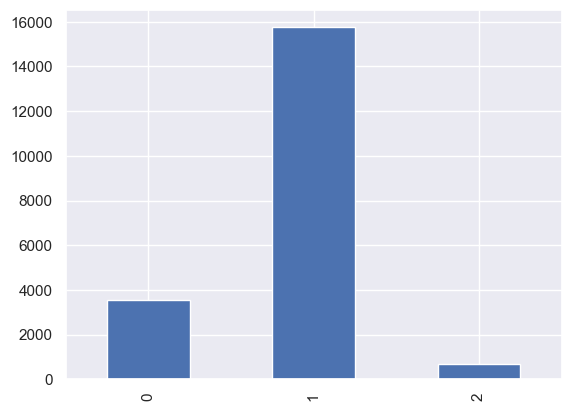

In [118]:
counts.plot.bar("health")

ÁõÆÁöÑÂ§âÊï∞„ÅØ1(good)„Åß„ÅÇ„Çã„Åì„Å®„ÅåÊÆÜ„Å©„Å†„Åå„ÄÅ0„ÇÑ2(normal, bad)„ÅåÁ¥Ñ20%„ÄÇ

OnCurb            18777
OffsetFromCurb     1207
Name: curb_loc, dtype: int64


<Axes: >

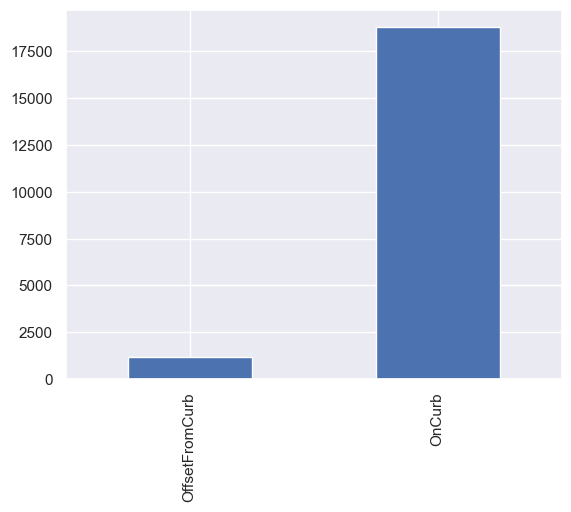

In [119]:
#ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
counts = train["curb_loc"].value_counts()
print(counts)
counts = counts.sort_index()
counts.plot.bar("curb_loc")

1or2       3999
3or4       1079
4orMore      23
Name: steward, dtype: int64


<Axes: >

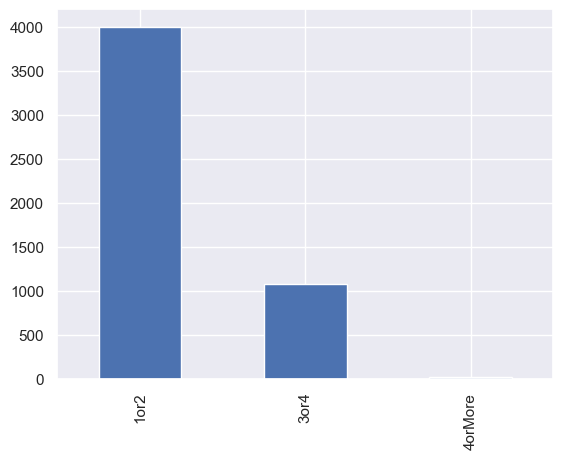

In [120]:
#ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
counts = train["steward"].value_counts()
print(counts)
counts = counts.sort_index()
counts.plot.bar("steward")

Helpful    3650
Unsure      737
Harmful     654
Name: guards, dtype: int64


<Axes: >

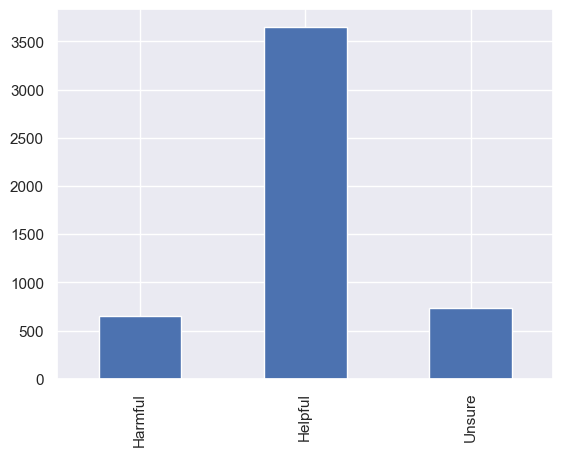

In [121]:
#ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
counts = train["guards"].value_counts()
print(counts)

counts = counts.sort_index()
counts.plot.bar("guards")

NoDamage    10689
Damage       9295
Name: sidewalk, dtype: int64


<Axes: >

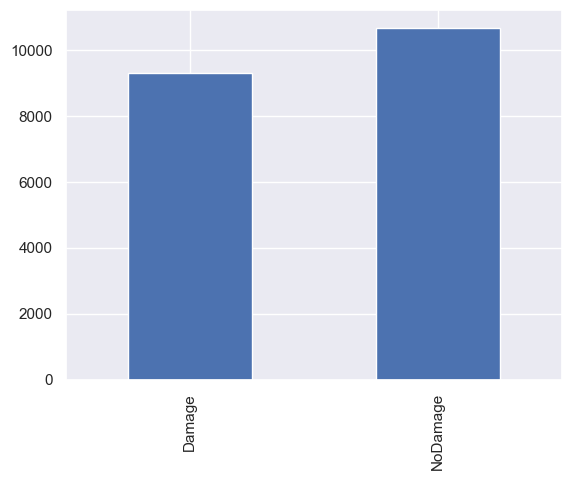

In [122]:
#ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
counts = train["sidewalk"].value_counts()
print(counts)

counts = counts.sort_index()
counts.plot.bar("sidewalk")

Volunteer           11189
TreesCount Staff     5795
NYC Parks Staff      3000
Name: user_type, dtype: int64


<Axes: >

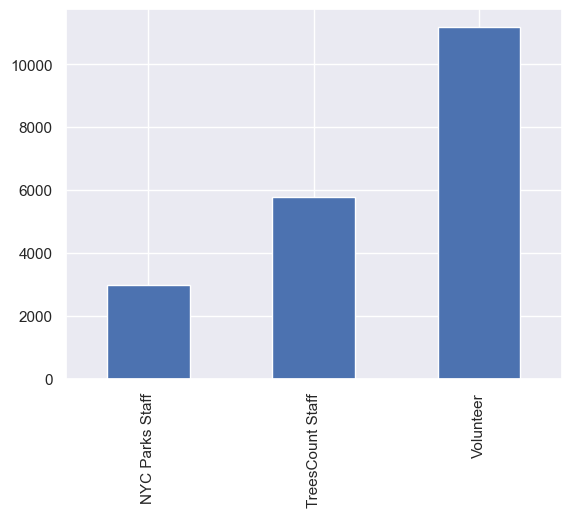

In [123]:
#ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
counts = train["user_type"].value_counts()
print(counts)

counts = counts.sort_index()
counts.plot.bar("user_type")

<Axes: >

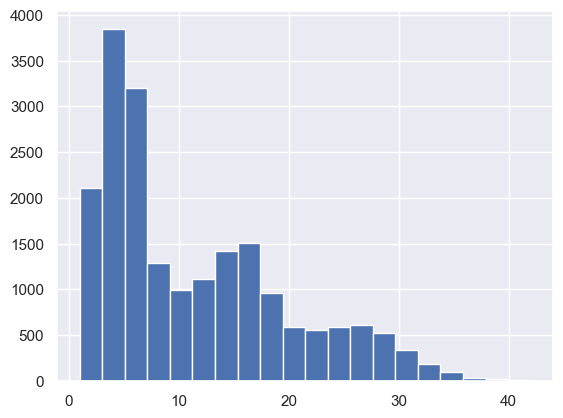

In [124]:
train["tree_dbh"].hist(bins=20)

‚Üí „Éù„Ç¢„ÇΩ„É≥ÂàÜÂ∏É„Å´Ëøë„ÅÑ„ÄÇÊåáÊï∞Âåñ„Åô„Çå„Å∞„Çà„ÇäÊúâÂäπ„Å™ÂÄ§„Å´„Å™„Çã„Åã„ÇÇÔºü

Stones                                  2219
BranchLights                            1036
StonesBranchLights                       762
BranchOther                              408
RootOther                                333
                                        ... 
StonesRootOtherTrunkOtherBranchOther       8
StonesRootOtherWiresRopeBranchOther        5
StonesMetalGratesTrunkOther                4
TrunkLightsBranchLightsBranchOther         4
WiresRopeTrunkLightsBranchLights           4
Name: problems, Length: 73, dtype: int64


<Axes: >

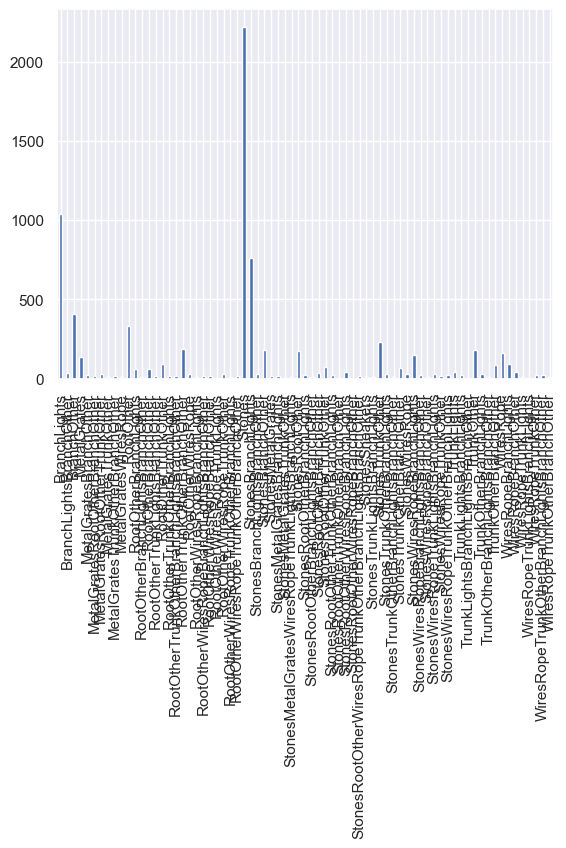

In [125]:
#ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
counts = train["problems"].value_counts()
print(counts)

counts = counts.sort_index()
counts.plot.bar("problems")

In [126]:
#ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
prob_counts = train["problems"].value_counts()
print(prob_counts)

#counts = counts.sort_index()
prob_counts[:10]

Stones                                  2219
BranchLights                            1036
StonesBranchLights                       762
BranchOther                              408
RootOther                                333
                                        ... 
StonesRootOtherTrunkOtherBranchOther       8
StonesRootOtherWiresRopeBranchOther        5
StonesMetalGratesTrunkOther                4
TrunkLightsBranchLightsBranchOther         4
WiresRopeTrunkLightsBranchLights           4
Name: problems, Length: 73, dtype: int64


Stones                            2219
BranchLights                      1036
StonesBranchLights                 762
BranchOther                        408
RootOther                          333
StonesTrunkOther                   230
RootOtherTrunkOtherBranchOther     190
TrunkOther                         183
StonesBranchOther                  180
StonesRootOther                    173
Name: problems, dtype: int64

London planetree       2237
pin oak                2140
cherry                 1689
Japanese zelkova       1470
littleleaf linden      1303
                       ... 
Chinese chestnut          3
pignut hickory            3
Kentucky yellowwood       2
pond cypress              1
Himalayan cedar           1
Name: spc_common, Length: 120, dtype: int64


<Axes: >

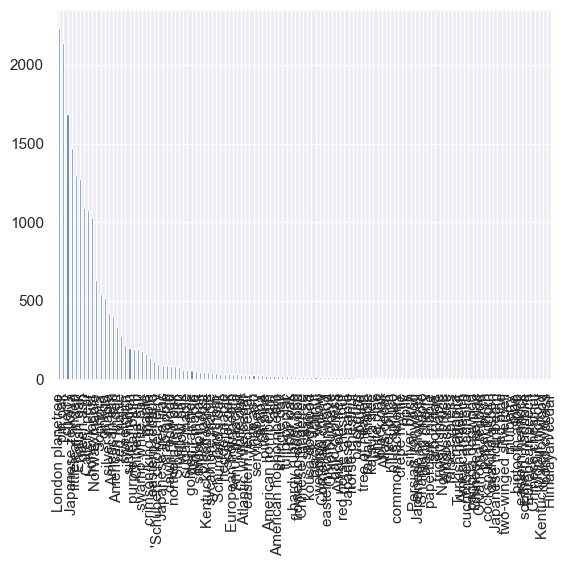

In [127]:
spc_counts = train["spc_common"].value_counts()
print(spc_counts)

#counts = counts.sort_index()
spc_counts.plot.bar("spc_common")

In [128]:
# Êú®„ÅÆÁ®ÆÈ°û - ÊúÄÂàù„ÅÆ10„Çí„ÉÄ„Éü„ÉºÂåñ„Åô„Çã
counts[:15].sum()

2216

Platanus x acerifolia    2237
Quercus palustris        2140
Prunus                   1689
Zelkova serrata          1470
Tilia cordata            1303
                         ... 
Castanea mollissima         3
Carya glabra                3
Cladrastis kentukea         2
Taxodium ascendens          1
Cedrus deodara              1
Name: spc_latin, Length: 120, dtype: int64


<Axes: >

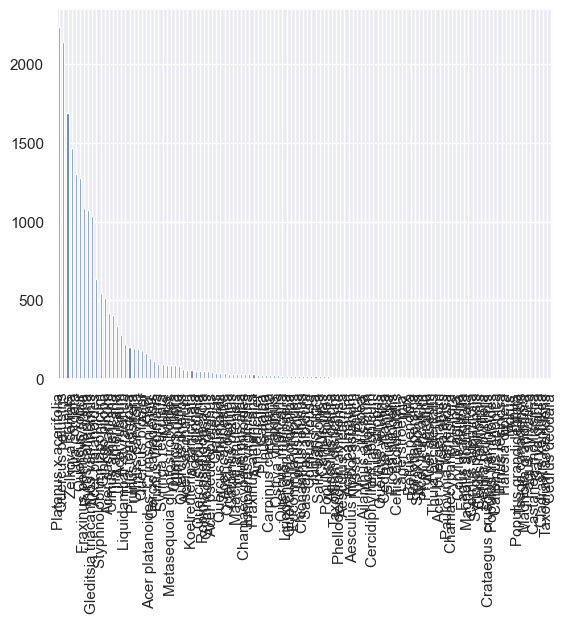

In [129]:
counts = train["spc_latin"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("spc_latin")

In [130]:
# Êú®„ÅÆÁ®ÆÈ°û - ÊúÄÂàù„ÅÆ10„Çí„ÉÄ„Éü„ÉºÂåñ„Åô„Çã
counts[:10]

Platanus x acerifolia                 2237
Quercus palustris                     2140
Prunus                                1689
Zelkova serrata                       1470
Tilia cordata                         1303
Quercus robur                         1277
Fraxinus pennsylvanica                1089
Pyrus calleryana                      1076
Gleditsia triacanthos var. inermis    1034
Acer platanoides                       634
Name: spc_latin, dtype: int64

SI54    368
SI11    359
BK82    326
BK45    306
SI32    306
       ... 
MN17      6
MN21      5
QN68      4
BK27      2
MN20      1
Name: nta, Length: 187, dtype: int64


<Axes: >

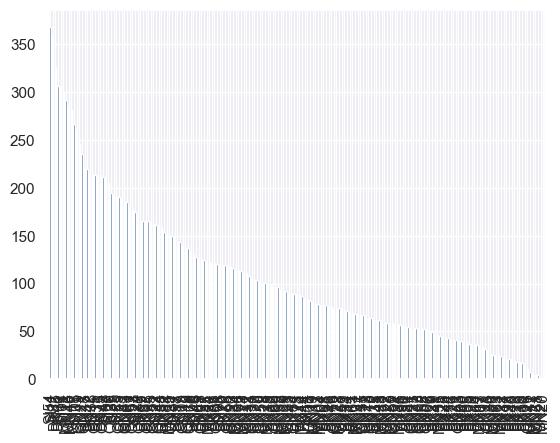

In [131]:
#Âú∞ÂüüÔºàNeighborhood Tabulation AreaÔºâ„ÅÆÁï•Áß∞
counts = train["nta"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("nta")

Great Kills                                       368
Charleston-Richmond Valley-Tottenville            359
East New York                                     326
Georgetown-Marine Park-Bergen Beach-Mill Basin    306
Rossville-Woodrow                                 306
                                                 ... 
Midtown-Midtown South                               6
Gramercy                                            5
Queensbridge-Ravenswood-Long Island City            4
Bath Beach                                          2
Murray Hill-Kips Bay                                1
Name: nta_name, Length: 187, dtype: int64


<Axes: >

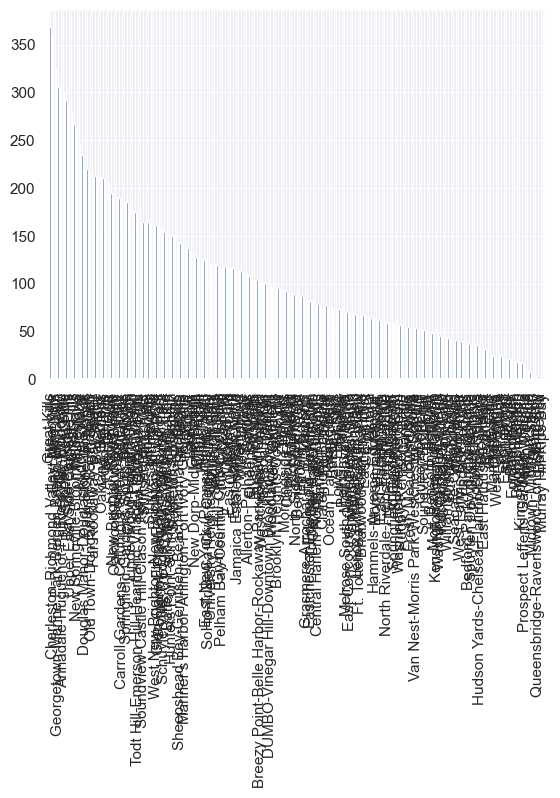

In [132]:
#Âú∞ÂüüÔºàNeighborhood Tabulation AreaÔºâ„ÅÆÁï•Áß∞
counts = train["nta_name"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("nta_name")

In [133]:
# vill, beach, side, hill, park, water, bay, garden„Å™„Å©Êú®„Å´ÂΩ±Èüø„Åó„Åù„ÅÜ„Å™ÂêçÁß∞„ÇíÊäΩÂá∫„Åô„Çã„ÅãÔºüÔºü
counts[:30]

Great Kills                                       368
Charleston-Richmond Valley-Tottenville            359
East New York                                     326
Georgetown-Marine Park-Bergen Beach-Mill Basin    306
Rossville-Woodrow                                 306
Annadale-Huguenot-Prince's Bay-Eltingville        300
Upper West Side                                   292
Bayside-Bayside Hills                             285
Upper East Side-Carnegie Hill                     281
Forest Hills                                      267
New Springville-Bloomfield-Travis                 260
Whitestone                                        246
Middle Village                                    235
Douglas Manor-Douglaston-Little Neck              222
Park Slope-Gowanus                                220
Flatbush                                          216
Old Town-Dongan Hills-South Beach                 214
Far Rockaway-Bayswater                            213
Bay Ridge                   

4    6572
3    5119
5    3735
1    2288
2    2270
Name: borocode, dtype: int64


<Axes: >

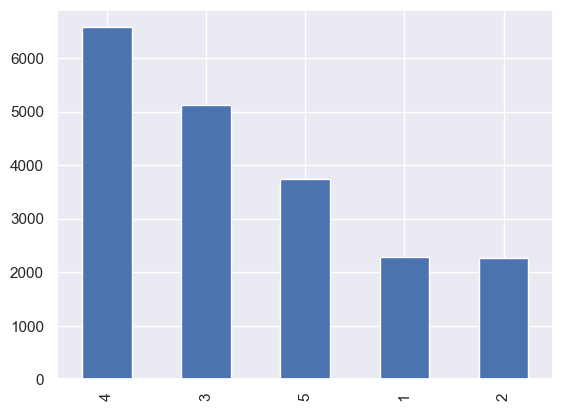

In [134]:
#„Éã„É•„Éº„É®„Éº„ÇØÂ∏Ç„ÅÆË°åÊîøÂå∫ÂàÜÔºà„Éú„É≠„ÉºÔºâ„ÅÆ„Ç≥„Éº„Éâ
#„Éú„É≠„Ç≥„Éº„Éâ„ÅØÈùûÂ∏∏„Å´ÊúâÁõä„Åù„ÅÜ„ÄÇÈáèÁöÑÂ§âÊï∞„Å´„Åô„Çã
counts = train["borocode"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("borocode")

5022600    204
1031704    149
5020804    126
5005900    112
5020801    103
          ... 
4026300      1
2041800      1
2011900      1
3039100      1
3066200      1
Name: boro_ct, Length: 1193, dtype: int64


<Axes: >

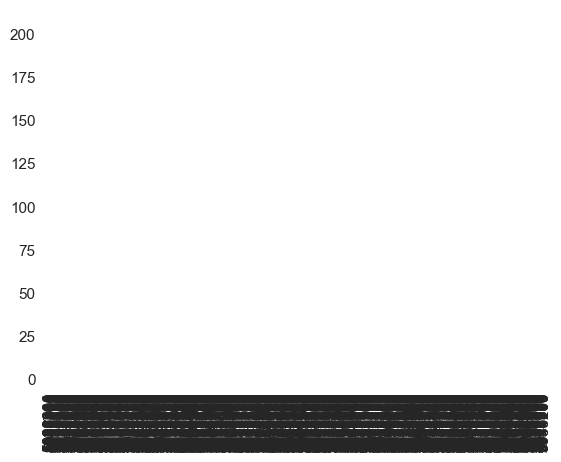

In [135]:
counts = train["boro_ct"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("boro_ct")

Queens           6572
Brooklyn         5119
Staten Island    3735
Manhattan        2288
Bronx            2270
Name: boroname, dtype: int64


<Axes: >

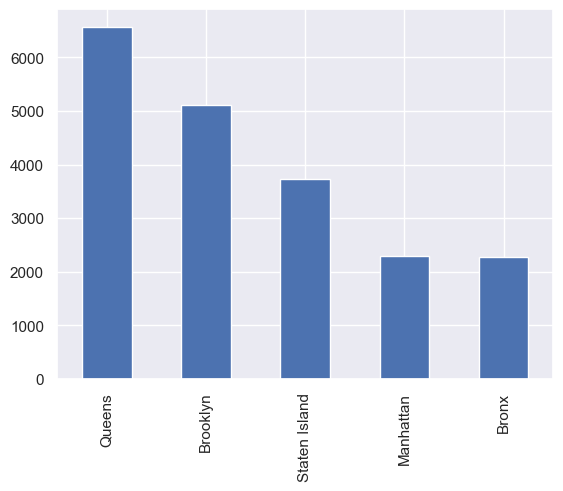

In [136]:
#„ÄÄ„Éã„É•„Éº„É®„Éº„ÇØÂ∏Ç„ÅÆË°åÊîøÂå∫ÂàÜÔºà„Éú„É≠„ÉºÔºâ„ÅÆÂêçÁß∞
#„ÄÄ„Éú„É≠„ÉºÂêçÁß∞„ÅØÊúâÂäπ„Åù„ÅÜ„ÄÇ„ÉÄ„Éü„ÉºÂ§âÊï∞„Å´„Åô„Çã

counts = train["boroname"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("boroname")

Brooklyn               5119
Staten Island          3735
Bronx                  2270
New York               2267
Jamaica                 660
Flushing                615
Ridgewood               331
Oakland Gardens         281
Whitestone              252
Springfield Gardens     248
Forest Hills            248
Far Rockaway            241
Fresh Meadows           226
Little Neck             222
Bayside                 218
Middle Village          213
Rosedale                186
Howard Beach            178
Queens Village          173
Astoria                 161
South Ozone Park        145
East Elmhurst           143
Bellerose               141
College Point           135
Maspeth                 129
Ozone Park              129
Glen Oaks               128
Long Island City        114
Woodside                108
Richmond Hill           104
Elmhurst                104
Cambria Heights          91
Rockaway Park            84
Kew Gardens              68
Saint Albans             68
Hollis              

<Axes: >

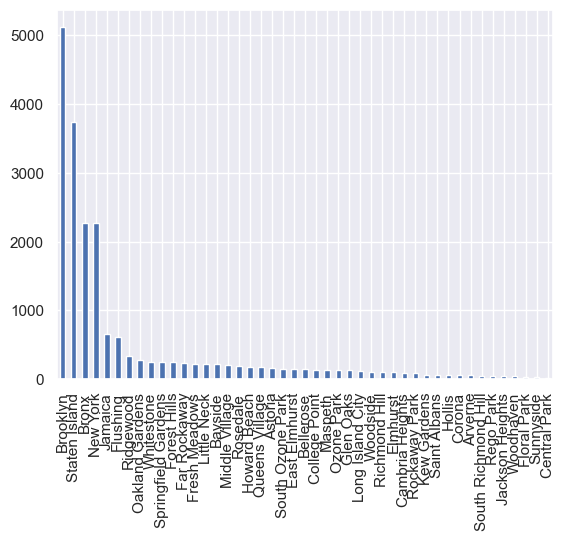

In [137]:
#„ÄÄÈÉµ‰æøÁï™Âè∑„Å´Èñ¢ÈÄ£„Åô„ÇãÈÉΩÂ∏Ç„Åæ„Åü„ÅØÂú∞Âå∫
#„ÄÄÊúÄÂàù„ÅÆ5-10ÂÄã„Çí„ÉÄ„Éü„ÉºÂåñ„Åô„Çã„Åã??
# È†ªÂ∫¶„ÇíÈáèÁöÑÂ§âÊï∞„Å´„Åô„Çã„ÄÅ„Å™„Å©„Çà„ÇäÊúâÂäπ„Å™„ÉÄ„Éü„ÉºÂåñ„ÇÇÊ§úË®é‰∏≠

counts = train["zip_city"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("zip_city")

503    1735
501    1140
413    1026
502     860
411     843
407     778
405     672
305     620
408     560
412     517
318     505
301     503
410     486
108     442
107     435
306     414
303     397
302     379
414     379
209     358
210     353
315     338
314     303
406     296
212     271
307     263
312     257
101     252
211     250
310     250
402     229
409     225
401     214
111     184
403     175
316     174
404     172
112     170
103     156
110     149
205     148
208     141
311     140
206     140
109     139
317     136
202     135
104     134
102     133
308     133
204     129
203     128
201     128
309     119
304     117
207      89
106      87
313      71
105       7
Name: cb_num, dtype: int64


<Axes: >

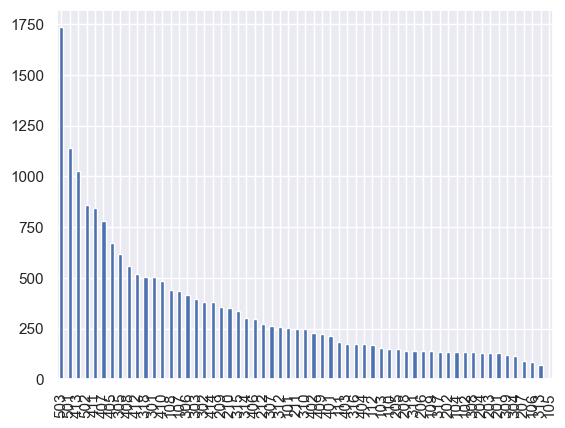

In [138]:
#„ÄÄ„Éã„É•„Éº„É®„Éº„ÇØÂ∏Ç„ÅÆË°åÊîøÂå∫ÂàÜÔºà„Éú„É≠„ÉºÔºâ„ÅÆÂêçÁß∞
#„ÄÄ„Éú„É≠„ÉºÂêçÁß∞„ÅØÊúâÂäπ„Åù„ÅÜ„ÄÇ„ÉÄ„Éü„ÉºÂ§âÊï∞„Å´„Åô„Çã

counts = train["cb_num"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("cb_num")

24    2905
11    1885
15    1503
23    1035
10    1028
34     965
25     963
14     830
19     771
26     750
22     711
18     632
21     560
16     550
28     508
32     480
30     478
17     466
20     417
29     400
13     399
31     388
27     380
12     377
33     308
36     295
Name: st_senate, dtype: int64


<Axes: >

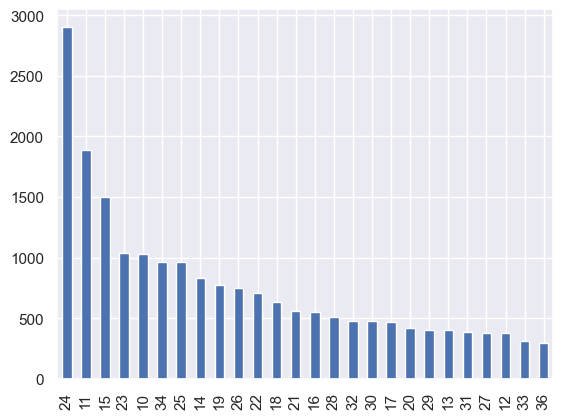

In [139]:
#„ÄÄ„Éã„É•„Éº„É®„Éº„ÇØÂ∏Ç„ÅÆË°åÊîøÂå∫ÂàÜÔºà„Éú„É≠„ÉºÔºâ„ÅÆÂêçÁß∞
#„ÄÄ„Éú„É≠„ÉºÂêçÁß∞„ÅØÊúâÂäπ„Åù„ÅÜ„ÄÇ„ÉÄ„Éü„ÉºÂ§âÊï∞„Å´„Åô„Çã

counts = train["st_senate"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("st_senate")

62    1459
64     827
63     789
61     783
26     696
      ... 
47     107
74      92
72      89
78      88
49      54
Name: st_assem, Length: 65, dtype: int64


<Axes: >

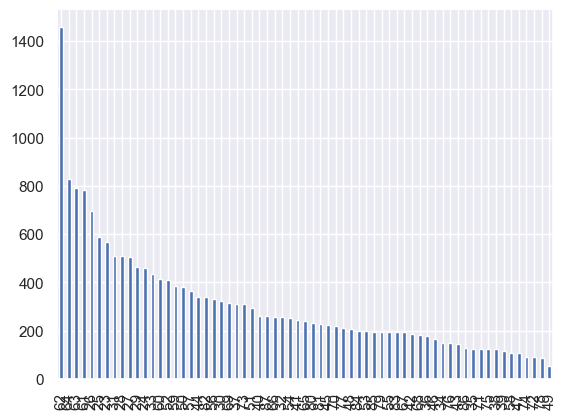

In [140]:
#„ÄÄ„Éã„É•„Éº„É®„Éº„ÇØÂ∏Ç„ÅÆË°åÊîøÂå∫ÂàÜÔºà„Éú„É≠„ÉºÔºâ„ÅÆÂêçÁß∞
#„ÄÄ„Éú„É≠„ÉºÂêçÁß∞„ÅØÊúâÂäπ„Åù„ÅÜ„ÄÇ„ÉÄ„Éü„ÉºÂ§âÊï∞„Å´„Åô„Çã

counts = train["st_assem"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("st_assem")

51    1604
50    1093
49    1038
19     889
23     849
31     788
30     660
24     539
32     538
33     529
13     485
46     449
39     429
35     413
29     413
42     396
27     393
4      382
36     371
28     365
6      355
37     347
18     337
17     334
20     326
1      320
43     282
48     278
9      270
38     269
41     267
3      265
34     264
44     256
11     249
12     245
45     239
47     233
7      229
26     214
15     207
22     194
25     181
8      177
14     175
21     169
16     163
40     151
10     140
5      127
2       98
Name: cncldist, dtype: int64


<Axes: >

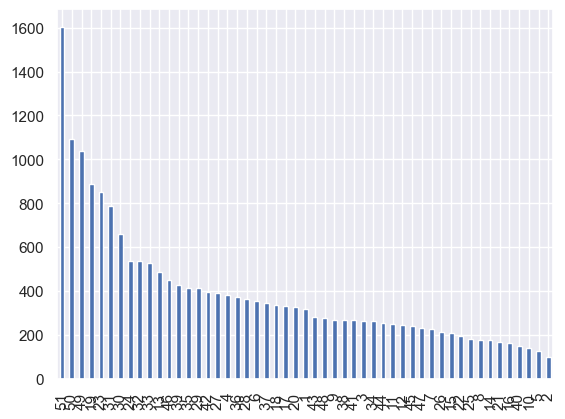

In [141]:
#„ÄÄ„Éã„É•„Éº„É®„Éº„ÇØÂ∏Ç„ÅÆË°åÊîøÂå∫ÂàÜÔºà„Éú„É≠„ÉºÔºâ„ÅÆÂêçÁß∞
#„ÄÄ„Éú„É≠„ÉºÂêçÁß∞„ÅØÊúâÂäπ„Åù„ÅÜ„ÄÇ„ÉÄ„Éü„ÉºÂ§âÊï∞„Å´„Åô„Çã

counts = train["cncldist"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("cncldist")

In [142]:
len(counts)

51

# ÂâçÂá¶ÁêÜ

# „Éô„Éº„Çπ„É©„Ç§„É≥‰ΩúÊàê„Å´Áî®„ÅÑ„ÇãÂ§âÊï∞
tree_dbh
curb_loc
steward
guards
sidewalk
user_type

In [143]:
x_list = ["tree_dbh","curb_loc","steward","guards","sidewalk","user_type","problems","spc_common","nta","borocode","boro_ct", "zip_city", "cb_num", "st_senate", "st_assem", "cncldist"]
y_list = ["health"]
dummy_list = ["curb_loc","steward","guards","sidewalk","user_type","borocode"]

In [144]:
train.head(5)

created_at  tree_dbh curb_loc  health steward   guards  sidewalk  \
0  2015-06-29        14   OnCurb       1     NaN      NaN    Damage   
1  2016-09-21         5   OnCurb       1    3or4  Helpful  NoDamage   
2  2015-09-13        26   OnCurb       2     NaN      NaN  NoDamage   
3  2016-05-09        15   OnCurb       0     NaN      NaN    Damage   
4  2016-06-24        23   OnCurb       1     NaN      NaN  NoDamage   

         user_type            problems          spc_common  ...   nta  \
0        Volunteer                 NaN         English oak  ...  QN45   
1        Volunteer                 NaN  crimson king maple  ...  BX05   
2        Volunteer  StonesBranchLights         English oak  ...  SI01   
3  NYC Parks Staff                 NaN         honeylocust  ...  SI11   
4        Volunteer              Stones    London planetree  ...  MN03   

                                     nta_name borocode  boro_ct  \
0        Douglas Manor-Douglaston-Little Neck        4  4152901   
1                  Bedford Park-Fordham North        2  2039901   
2  Annadale-Huguenot-Prince's Bay-Eltingville        5  5017011   
3      Charleston-Richmond Valley-Tottenville        5  5024401   
4           Central Harlem North-Polo Grounds        1  1022102   

        boroname       zip_city cb_num  st_senate  st_assem  cncldist  
0         Queens    Little Neck    411         11        25        23  
1          Bronx          Bronx    207         33        78        15  
2  Staten Island  Staten Island    503         24        62        51  
3  Staten Island  Staten Island    503         24        62        51  
4      Manhattan       New York    110         30        70         9  

[5 rows x 21 columns]

In [145]:
train.head(5)

created_at  tree_dbh curb_loc  health steward   guards  sidewalk  \
0  2015-06-29        14   OnCurb       1     NaN      NaN    Damage   
1  2016-09-21         5   OnCurb       1    3or4  Helpful  NoDamage   
2  2015-09-13        26   OnCurb       2     NaN      NaN  NoDamage   
3  2016-05-09        15   OnCurb       0     NaN      NaN    Damage   
4  2016-06-24        23   OnCurb       1     NaN      NaN  NoDamage   

         user_type            problems          spc_common  ...   nta  \
0        Volunteer                 NaN         English oak  ...  QN45   
1        Volunteer                 NaN  crimson king maple  ...  BX05   
2        Volunteer  StonesBranchLights         English oak  ...  SI01   
3  NYC Parks Staff                 NaN         honeylocust  ...  SI11   
4        Volunteer              Stones    London planetree  ...  MN03   

                                     nta_name borocode  boro_ct  \
0        Douglas Manor-Douglaston-Little Neck        4  4152901   
1                  Bedford Park-Fordham North        2  2039901   
2  Annadale-Huguenot-Prince's Bay-Eltingville        5  5017011   
3      Charleston-Richmond Valley-Tottenville        5  5024401   
4           Central Harlem North-Polo Grounds        1  1022102   

        boroname       zip_city cb_num  st_senate  st_assem  cncldist  
0         Queens    Little Neck    411         11        25        23  
1          Bronx          Bronx    207         33        78        15  
2  Staten Island  Staten Island    503         24        62        51  
3  Staten Island  Staten Island    503         24        62        51  
4      Manhattan       New York    110         30        70         9  

[5 rows x 21 columns]

## Êú®„ÅÆÂÅ•Â∫∑Áä∂ÊÖãÔºàÁõÆÁöÑÂ§âÊï∞Ôºâ
0:FairÔºàÊôÆÈÄöÔºâ 1:GoodÔºàËâØ„ÅÑÔºâ 2:PoorÔºàÊÇ™„ÅÑÔºâ
0:ËâØ„ÅÑ„ÄÅ1:ÊôÆÈÄö„ÄÅ2:ÊÇ™„ÅÑ„ÄÅ„Å®„ÅÑ„ÅÜÂÄ§„Å´ÁΩÆ„ÅçÊèõ„Åà„Çã

In [146]:
train['health'] = train['health'].map({0:1, 1:0, 2:2})
train

created_at  tree_dbh curb_loc  health steward   guards  sidewalk  \
0      2015-06-29        14   OnCurb       0     NaN      NaN    Damage   
1      2016-09-21         5   OnCurb       0    3or4  Helpful  NoDamage   
2      2015-09-13        26   OnCurb       2     NaN      NaN  NoDamage   
3      2016-05-09        15   OnCurb       1     NaN      NaN    Damage   
4      2016-06-24        23   OnCurb       0     NaN      NaN  NoDamage   
...           ...       ...      ...     ...     ...      ...       ...   
19979  2016-07-15        19   OnCurb       2     NaN      NaN    Damage   
19980  2016-07-08         5   OnCurb       0     NaN      NaN  NoDamage   
19981  2015-08-20        21   OnCurb       1     NaN      NaN    Damage   
19982  2016-06-20         4   OnCurb       0    1or2      NaN  NoDamage   
19983  2015-08-19        31   OnCurb       0     NaN      NaN    Damage   

             user_type            problems          spc_common  ...   nta  \
0            Volunteer                 NaN         English oak  ...  QN45   
1            Volunteer                 NaN  crimson king maple  ...  BX05   
2            Volunteer  StonesBranchLights         English oak  ...  SI01   
3      NYC Parks Staff                 NaN         honeylocust  ...  SI11   
4            Volunteer              Stones    London planetree  ...  MN03   
...                ...                 ...                 ...  ...   ...   
19979        Volunteer                 NaN         shingle oak  ...  SI24   
19980  NYC Parks Staff                 NaN             catalpa  ...  SI32   
19981        Volunteer                 NaN         English oak  ...  SI48   
19982  NYC Parks Staff                 NaN   littleleaf linden  ...  MN25   
19983  NYC Parks Staff              Stones         honeylocust  ...  BX59   

                                                nta_name borocode  boro_ct  \
0                   Douglas Manor-Douglaston-Little Neck        4  4152901   
1                             Bedford Park-Fordham North        2  2039901   
2             Annadale-Huguenot-Prince's Bay-Eltingville        5  5017011   
3                 Charleston-Richmond Valley-Tottenville        5  5024401   
4                      Central Harlem North-Polo Grounds        1  1022102   
...                                                  ...      ...      ...   
19979  Todt Hill-Emerson Hill-Heartland Village-Light...        5  5018100   
19980                                  Rossville-Woodrow        5  5020804   
19981                                      Arden Heights        5  5017010   
19982                  Battery Park City-Lower Manhattan        1  1031704   
19983                              Westchester-Unionport        2  2007800   

            boroname       zip_city cb_num  st_senate  st_assem  cncldist  
0             Queens    Little Neck    411         11        25        23  
1              Bronx          Bronx    207         33        78        15  
2      Staten Island  Staten Island    503         24        62        51  
3      Staten Island  Staten Island    503         24        62        51  
4          Manhattan       New York    110         30        70         9  
...              ...            ...    ...        ...       ...       ...  
19979  Staten Island  Staten Island    502         24        62        50  
19980  Staten Island  Staten Island    503         24        62        51  
19981  Staten Island  Staten Island    503         24        62        51  
19982      Manhattan       New York    101         26        65         1  
19983          Bronx          Bronx    209         32        87        18  

[19984 rows x 21 columns]

In [147]:
#„ÄÄË™¨ÊòéÂ§âÊï∞+ÁõÆÁöÑÂ§âÊï∞„Å®„Éê„É™„Éá„Éº„Ç∑„Éß„É≥Ë®≠Ë®à
X_train, y_train = train[x_list], train[y_list]
X_train

tree_dbh curb_loc steward   guards  sidewalk        user_type  \
0            14   OnCurb     NaN      NaN    Damage        Volunteer   
1             5   OnCurb    3or4  Helpful  NoDamage        Volunteer   
2            26   OnCurb     NaN      NaN  NoDamage        Volunteer   
3            15   OnCurb     NaN      NaN    Damage  NYC Parks Staff   
4            23   OnCurb     NaN      NaN  NoDamage        Volunteer   
...         ...      ...     ...      ...       ...              ...   
19979        19   OnCurb     NaN      NaN    Damage        Volunteer   
19980         5   OnCurb     NaN      NaN  NoDamage  NYC Parks Staff   
19981        21   OnCurb     NaN      NaN    Damage        Volunteer   
19982         4   OnCurb    1or2      NaN  NoDamage  NYC Parks Staff   
19983        31   OnCurb     NaN      NaN    Damage  NYC Parks Staff   

                 problems          spc_common   nta  borocode  boro_ct  \
0                     NaN         English oak  QN45         4  4152901   
1                     NaN  crimson king maple  BX05         2  2039901   
2      StonesBranchLights         English oak  SI01         5  5017011   
3                     NaN         honeylocust  SI11         5  5024401   
4                  Stones    London planetree  MN03         1  1022102   
...                   ...                 ...   ...       ...      ...   
19979                 NaN         shingle oak  SI24         5  5018100   
19980                 NaN             catalpa  SI32         5  5020804   
19981                 NaN         English oak  SI48         5  5017010   
19982                 NaN   littleleaf linden  MN25         1  1031704   
19983              Stones         honeylocust  BX59         2  2007800   

            zip_city  cb_num  st_senate  st_assem  cncldist  
0        Little Neck     411         11        25        23  
1              Bronx     207         33        78        15  
2      Staten Island     503         24        62        51  
3      Staten Island     503         24        62        51  
4           New York     110         30        70         9  
...              ...     ...        ...       ...       ...  
19979  Staten Island     502         24        62        50  
19980  Staten Island     503         24        62        51  
19981  Staten Island     503         24        62        51  
19982       New York     101         26        65         1  
19983          Bronx     209         32        87        18  

[19984 rows x 16 columns]

In [148]:
y_train

health
0           0
1           0
2           2
3           1
4           0
...       ...
19979       2
19980       0
19981       1
19982       0
19983       0

[19984 rows x 1 columns]

In [149]:
X_train.isnull().sum()

tree_dbh          0
curb_loc          0
steward       14883
guards        14943
sidewalk          0
user_type         0
problems      12243
spc_common        0
nta               0
borocode          0
boro_ct           0
zip_city          0
cb_num            0
st_senate         0
st_assem          0
cncldist          0
dtype: int64

‚Üí„ÄÄÊ¨†ÊêçÂÄ§„ÅØ'NULL'„Å®„ÅÑ„ÅÜ„Ç´„ÉÜ„Ç¥„É™„Å´ÁΩÆ„ÅçÊèõ„Åà„ÄÅÊ¨†Êêç„Åß„ÅÇ„Çã„Å®„ÅÑ„ÅÜÊÉÖÂ†±=Ë≥™ÁöÑÂ§âÊï∞„ÅÆ1„Å§„Å®„Åó„Å¶Âá¶ÁêÜ„Åô„Çã

In [150]:
train.fillna('NULL', inplace=True)

In [151]:
column_means = train.groupby("steward")["health"].mean("health")
column_means

steward
1or2      0.22
3or4      0.30
4orMore   0.48
NULL      0.25
Name: health, dtype: float64

In [152]:
test["steward"]

19984     NaN
19985    1or2
19986     NaN
19987     NaN
19988    1or2
         ... 
39964    1or2
39965    1or2
39966     NaN
39967     NaN
39968     NaN
Name: steward, Length: 19702, dtype: object

In [153]:
X_train.fillna('NULL', inplace=True)

In [154]:
X_train.head(10)

tree_dbh curb_loc steward   guards  sidewalk         user_type  \
0        14   OnCurb    NULL     NULL    Damage         Volunteer   
1         5   OnCurb    3or4  Helpful  NoDamage         Volunteer   
2        26   OnCurb    NULL     NULL  NoDamage         Volunteer   
3        15   OnCurb    NULL     NULL    Damage   NYC Parks Staff   
4        23   OnCurb    NULL     NULL  NoDamage         Volunteer   
5        12   OnCurb    NULL     NULL    Damage         Volunteer   
6         8   OnCurb    NULL  Helpful    Damage         Volunteer   
7         6   OnCurb    NULL     NULL  NoDamage   NYC Parks Staff   
8        18   OnCurb    NULL     NULL    Damage  TreesCount Staff   
9        20   OnCurb    NULL     NULL  NoDamage         Volunteer   

             problems          spc_common   nta  borocode  boro_ct  \
0                NULL         English oak  QN45         4  4152901   
1                NULL  crimson king maple  BX05         2  2039901   
2  StonesBranchLights         English oak  SI01         5  5017011   
3                NULL         honeylocust  SI11         5  5024401   
4              Stones    London planetree  MN03         1  1022102   
5                NULL      Amur cork tree  QN22         4  4088901   
6        BranchLights   littleleaf linden  QN22         4  4086500   
7                NULL              cherry  QN08         4  4052400   
8                NULL        Siberian elm  BK82         3  3116600   
9              Stones    London planetree  QN52         4  4120300   

        zip_city  cb_num  st_senate  st_assem  cncldist  
0    Little Neck     411         11        25        23  
1          Bronx     207         33        78        15  
2  Staten Island     503         24        62        51  
3  Staten Island     503         24        62        51  
4       New York     110         30        70         9  
5       Flushing     407         11        40        20  
6       Flushing     407         16        40        20  
7   Saint Albans     412         14        33        27  
8       Brooklyn     305         18        54        37  
9       Flushing     407         16        25        20

In [155]:
# problems„ÇíboolÂ§âÊèõ ‚Üí ÂïèÈ°å„Åå„ÅÇ„Çã„ÅãÂê¶„Åã„ÅÆ„ÉÄ„Éü„ÉºÂ§âÊï∞„Å´„Åô„Çã
# train['bool_problems'] = train['problems'].apply(lambda x: 0 if x=='NULL' else 1)

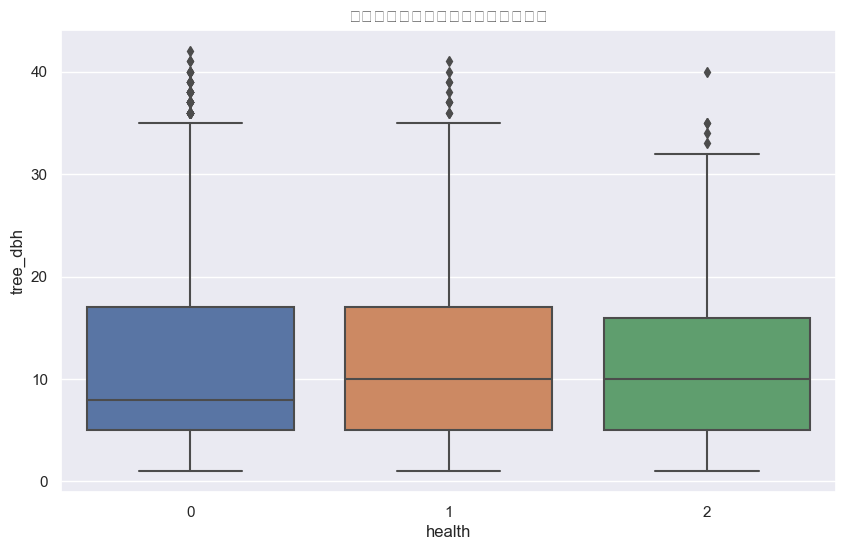

In [156]:
#„ÄÄÊú®„ÅÆÁõ¥ÂæÑ„Å®health„ÅÆÈñ¢‰øÇ
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

plt.figure(figsize=(10, 6))
sns.boxplot(x='health', y='tree_dbh', data=train)
plt.title('Êú®„ÅÆÂÜÜÂë®„ÉªÊú®„ÅÆÂÅ•Â∫∑Áä∂ÊÖã„ÅÆÁÆ±„Å≤„ÅíÂõ≥')
plt.show()

‚Üí bad„Å™Êú®„ÅØËã•Âπ≤ÂÜÜÂë®„ÅåÂ§ß„Åç„ÅÑ„ÄÇËÇ≤„Å°„Åô„ÅéÁ≠â„ÅÆÂéüÂõ†„Åå„ÅÇ„Çã„Åã„ÇÇ„Åó„Çå„Å™„ÅÑ

# ÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞

‰ªäÂõû„ÅÆÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞

x_list = ["tree_dbh", "curb_loc","steward","guards","sidewalk","user_type"]
y_list = ["health"]
dummy_list = ["curb_loc","steward","guards","sidewalk","user_type"]

- ["curb_loc","steward","guards","sidewalk","user_type"]„Çí„ÉÄ„Éü„ÉºÂåñ„Åô„Çã
- "problems"„Çí„ÉÄ„Éü„ÉºÂåñ„Åô„Çã„ÄÇ„Åù„ÅÆÈöõÊúÄÂàù„ÅÆ10Ë°å„Å†„Åë„ÇíÊÆã„Åô


# Â∞ëÊï∞„ÅÆË≥™ÁöÑÂ§âÊï∞„Çí„ÉÄ„Éü„ÉºÂåñ
["curb_loc","steward","guards","sidewalk","user_type","borocode"]

In [157]:
dummy_list = ["curb_loc","steward","guards","sidewalk","user_type","borocode"]

X_train = pd.get_dummies(X_train, columns = dummy_list, drop_first=False)
X_train

tree_dbh            problems          spc_common   nta  boro_ct  \
0            14                NULL         English oak  QN45  4152901   
1             5                NULL  crimson king maple  BX05  2039901   
2            26  StonesBranchLights         English oak  SI01  5017011   
3            15                NULL         honeylocust  SI11  5024401   
4            23              Stones    London planetree  MN03  1022102   
...         ...                 ...                 ...   ...      ...   
19979        19                NULL         shingle oak  SI24  5018100   
19980         5                NULL             catalpa  SI32  5020804   
19981        21                NULL         English oak  SI48  5017010   
19982         4                NULL   littleleaf linden  MN25  1031704   
19983        31              Stones         honeylocust  BX59  2007800   

            zip_city  cb_num  st_senate  st_assem  cncldist  ...  \
0        Little Neck     411         11        25        23  ...   
1              Bronx     207         33        78        15  ...   
2      Staten Island     503         24        62        51  ...   
3      Staten Island     503         24        62        51  ...   
4           New York     110         30        70         9  ...   
...              ...     ...        ...       ...       ...  ...   
19979  Staten Island     502         24        62        50  ...   
19980  Staten Island     503         24        62        51  ...   
19981  Staten Island     503         24        62        51  ...   
19982       New York     101         26        65         1  ...   
19983          Bronx     209         32        87        18  ...   

       sidewalk_Damage  sidewalk_NoDamage  user_type_NYC Parks Staff  \
0                    1                  0                          0   
1                    0                  1                          0   
2                    0                  1                          0   
3                    1                  0                          1   
4                    0                  1                          0   
...                ...                ...                        ...   
19979                1                  0                          0   
19980                0                  1                          1   
19981                1                  0                          0   
19982                0                  1                          1   
19983                1                  0                          1   

       user_type_TreesCount Staff  user_type_Volunteer  borocode_1  \
0                               0                    1           0   
1                               0                    1           0   
2                               0                    1           0   
3                               0                    0           0   
4                               0                    1           1   
...                           ...                  ...         ...   
19979                           0                    1           0   
19980                           0                    0           0   
19981                           0                    1           0   
19982                           0                    0           1   
19983                           0                    0           0   

       borocode_2  borocode_3  borocode_4  borocode_5  
0               0           0           1           0  
1               1           0           0           0  
2               0           0           0           1  
3               0           0           0           1  
4               0           0           0           0  
...           ...         ...         ...         ...  
19979           0           0           0           1  
19980           0           0           0           1  
19981           0           0           0           1  
19982           0           0      

# Ë≥™ÁöÑÂ§âÊï∞„Çí„Çø„Éº„Ç≤„ÉÉ„Éà„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞
„Åæ„ÅöÂêÑ„Ç≥„É©„É†„ÅÆÂπ≥ÂùáÂÄ§„ÇíÊ±Ç„ÇÅ„Çã

In [158]:
# ‰∏ÄÊåô„Å´„Çø„Éº„Ç≤„ÉÉ„Éà„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞
cols = ["curb_loc","steward","guards","sidewalk","user_type","problems","spc_common","nta","borocode","boro_ct", "zip_city", "cb_num", "st_senate", "st_assem", "cncldist"]
for col in cols:
    column_means = train.groupby(col)["health"].mean("health")
    column_means
    
    colname = col + "_tg_enc"
    
    X_train[colname] = train[col].map(column_means)

In [159]:
X_train

tree_dbh            problems          spc_common   nta  boro_ct  \
0            14                NULL         English oak  QN45  4152901   
1             5                NULL  crimson king maple  BX05  2039901   
2            26  StonesBranchLights         English oak  SI01  5017011   
3            15                NULL         honeylocust  SI11  5024401   
4            23              Stones    London planetree  MN03  1022102   
...         ...                 ...                 ...   ...      ...   
19979        19                NULL         shingle oak  SI24  5018100   
19980         5                NULL             catalpa  SI32  5020804   
19981        21                NULL         English oak  SI48  5017010   
19982         4                NULL   littleleaf linden  MN25  1031704   
19983        31              Stones         honeylocust  BX59  2007800   

            zip_city  cb_num  st_senate  st_assem  cncldist  ...  \
0        Little Neck     411         11        25        23  ...   
1              Bronx     207         33        78        15  ...   
2      Staten Island     503         24        62        51  ...   
3      Staten Island     503         24        62        51  ...   
4           New York     110         30        70         9  ...   
...              ...     ...        ...       ...       ...  ...   
19979  Staten Island     502         24        62        50  ...   
19980  Staten Island     503         24        62        51  ...   
19981  Staten Island     503         24        62        51  ...   
19982       New York     101         26        65         1  ...   
19983          Bronx     209         32        87        18  ...   

       problems_tg_enc  spc_common_tg_enc  nta_tg_enc  borocode_tg_enc  \
0                 0.24               0.32        0.30             0.26   
1                 0.24               0.17        0.22             0.25   
2                 0.29               0.32        0.27             0.25   
3                 0.24               0.26        0.25             0.25   
4                 0.25               0.23        0.29             0.24   
...                ...                ...         ...              ...   
19979             0.24               0.38        0.33             0.25   
19980             0.24               0.04        0.24             0.25   
19981             0.24               0.32        0.21             0.25   
19982             0.24               0.25        0.19             0.24   
19983             0.25               0.26        0.29             0.25   

       boro_ct_tg_enc  zip_city_tg_enc  cb_num_tg_enc  st_senate_tg_enc  \
0                0.43             0.30           0.28              0.27   
1                0.21             0.25           0.24              0.28   
2                0.33             0.25           0.24              0.25   
3                0.26             0.25           0.24              0.25   
4                0.29             0.24           0.24              0.22   
...               ...              ...            ...               ...   
19979            0.44             0.25           0.26              0.25   
19980            0.29             0.25           0.24              0.25   
19981            0.26             0.25           0.24              0.25   
19982            0.17             0.24           0.24              0.21   
19983            0.19             0.25           0.29              0.23   

       st_assem_tg_enc  cncldist_tg_enc  
0                 0.27             0.28  
1                 0.22             0.29  
2                 0.25             0.25  
3                 0.25             0.25  
4                 0.21             0.23  
...                ...              ...  
19979             0.25             0.26  
19980             0.25             0.25  
19981             0.25             0.25  
19982             0.19             0.24  
19983             0.35             0.29  

[19984

In [160]:
# problems, spc_common„Çí„Éâ„É≠„ÉÉ„Éó„Ç¢„Ç¶„Éà
drop_col = ["problems","spc_common","nta","boro_ct", "zip_city", "cb_num", "st_senate", "st_assem", "cncldist"]

X_train = X_train.drop(drop_col , axis=1)
X_train

tree_dbh  curb_loc_OffsetFromCurb  curb_loc_OnCurb  steward_1or2  \
0            14                        0                1             0   
1             5                        0                1             0   
2            26                        0                1             0   
3            15                        0                1             0   
4            23                        0                1             0   
...         ...                      ...              ...           ...   
19979        19                        0                1             0   
19980         5                        0                1             0   
19981        21                        0                1             0   
19982         4                        0                1             1   
19983        31                        0                1             0   

       steward_3or4  steward_4orMore  steward_NULL  guards_Harmful  \
0                 0                0             1               0   
1                 1                0             0               0   
2                 0                0             1               0   
3                 0                0             1               0   
4                 0                0             1               0   
...             ...              ...           ...             ...   
19979             0                0             1               0   
19980             0                0             1               0   
19981             0                0             1               0   
19982             0                0             0               0   
19983             0                0             1               0   

       guards_Helpful  guards_NULL  ...  problems_tg_enc  spc_common_tg_enc  \
0                   0            1  ...             0.24               0.32   
1                   1            0  ...             0.24               0.17   
2                   0            1  ...             0.29               0.32   
3                   0            1  ...             0.24               0.26   
4                   0            1  ...             0.25               0.23   
...               ...          ...  ...              ...                ...   
19979               0            1  ...             0.24               0.38   
19980               0            1  ...             0.24               0.04   
19981               0            1  ...             0.24               0.32   
19982               0            1  ...             0.24               0.25   
19983               0            1  ...             0.25               0.26   

       nta_tg_enc  borocode_tg_enc  boro_ct_tg_enc  zip_city_tg_enc  \
0            0.30             0.26            0.43             0.30   
1            0.22             0.25            0.21             0.25   
2            0.27             0.25            0.33             0.25   
3            0.25             0.25            0.26             0.25   
4            0.29             0.24            0.29             0.24   
...           ...              ...             ...              ...   
19979        0.33             0.25            0.44             0.25   
19980        0.24             0.25            0.29             0.25   
19981        0.21             0.25            0.26             0.25   
19982        0.19             0.24            0.17             0.24   
19983        0.29             0.25            0.19             0.25   

       cb_num_tg_enc  st_senate_tg_enc  st_assem_tg_enc  cncldist_tg_enc  
0               0.28              0.27             0.27             0.28  
1               0.24              0.28             0.22             0.29  
2               0.24              0.25             0.25             0.25  
3               0.24              0.25             0.25             0.25  
4               0.24              0.22             0.21             0.23  
...          

In [161]:
# ÂèØË¶ñÂåñ„É©„Ç§„Éñ„É©„É™
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

colormap = plt.cm.RdBu

In [162]:
corr = X_train.corr()

<Axes: >

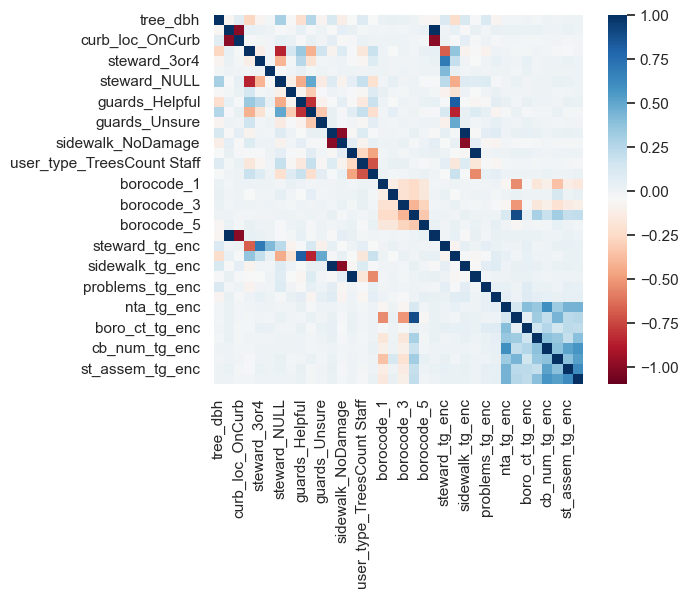

In [163]:
sns.heatmap(corr, square=True, 
            cmap=colormap, 
            linecolor='white', annot=False,
            vmin=1.0, vmax=-1.0)

# Ê®ôÊ∫ñÂåñ

In [164]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = pd.DataFrame(std_scaler.transform(X_train), columns=X_train.columns)
X_train_std.describe()

tree_dbh  curb_loc_OffsetFromCurb  curb_loc_OnCurb  steward_1or2  \
count  19984.00                 19984.00         19984.00      19984.00   
mean      -0.00                     0.00            -0.00          0.00   
std        1.00                     1.00             1.00          1.00   
min       -1.30                    -0.25            -3.94         -0.50   
25%       -0.82                    -0.25             0.25         -0.50   
50%       -0.33                    -0.25             0.25         -0.50   
75%        0.65                    -0.25             0.25         -0.50   
max        3.70                     3.94             0.25          2.00   

       steward_3or4  steward_4orMore  steward_NULL  guards_Harmful  \
count      19984.00         19984.00      19984.00        19984.00   
mean          -0.00            -0.00         -0.00            0.00   
std            1.00             1.00          1.00            1.00   
min           -0.24            -0.03         -1.71           -0.18   
25%           -0.24            -0.03         -1.71           -0.18   
50%           -0.24            -0.03          0.59           -0.18   
75%           -0.24            -0.03          0.59           -0.18   
max            4.19            29.46          0.59            5.44   

       guards_Helpful  guards_NULL  ...  problems_tg_enc  spc_common_tg_enc  \
count        19984.00     19984.00  ...         19984.00           19984.00   
mean            -0.00        -0.00  ...            -0.00               0.00   
std              1.00         1.00  ...             1.00               1.00   
min             -0.47        -1.72  ...            -4.66              -3.86   
25%             -0.47        -1.72  ...            -0.27              -0.66   
50%             -0.47         0.58  ...            -0.27               0.01   
75%             -0.47         0.58  ...             0.04               0.41   
max              2.12         0.58  ...            17.85              11.78   

       nta_tg_enc  borocode_tg_enc  boro_ct_tg_enc  zip_city_tg_enc  \
count    19984.00         19984.00        19984.00         19984.00   
mean         0.00             0.00            0.00            -0.00   
std          1.00             1.00            1.00             1.00   
min         -4.40            -1.53           -1.76            -4.46   
25%         -0.59            -0.88           -0.57            -0.29   
50%         -0.03            -0.13           -0.04            -0.12   
75%          0.65             1.27            0.43             0.02   
max         31.25             1.27           12.51             3.72   

       cb_num_tg_enc  st_senate_tg_enc  st_assem_tg_enc  cncldist_tg_enc  
count       19984.00          19984.00         19984.00         19984.00  
mean            0.00             -0.00            -0.00             0.00  
std             1.00              1.00             1.00             1.00  
min            -2.92             -2.73            -4.33            -3.14  
25%            -0.55             -0.56            -0.60            -0.50  
50%            -0.08              0.02            -0.05            -0.07  
75%             0.82              0.62             0.68             0.83  
max            24.69              3.51             3.07             2.37  

[8 rows x 36 columns]

# ÁâπÂæ¥ÈáèÈÅ∏Êäû
Â≠¶Áøí„Å´‰Ωø„ÅÜÁâπÂæ¥Èáè„ÇíÂçäÂàÜ„Å´Áµû„Çã


In [165]:

from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# estimator„Å®„Åó„Å¶GBDT„Çí‰ΩøÁî®„ÄÇÁâπÂæ¥Èáè„Çí20ÂÄãÈÅ∏Êäû
selector = RFE(GradientBoostingRegressor(n_estimators=100, random_state=10), n_features_to_select=30)
selector.fit(X_train_std, y_train)
mask = selector.get_support()
#print(X.feature_names)
print(mask)

# ÈÅ∏Êäû„Åó„ÅüÁâπÂæ¥Èáè„ÅÆÂàó„ÅÆ„ÅøÂèñÂæó
X_selected = selector.transform(X_train_std)
print("X.shape={}, X_selected.shape={}".format(X_train_std.shape, X_selected.shape))

list = []
not_selected = []
columns = X_train_std.columns

for i in range(0, len(mask)):
    
    value = mask[i]
    
    if (value == True):
        list.append(columns[i])
    else:
        not_selected.append(columns[i])

print("ÈÅ∏Êäû„Åï„Çå„Åü25„ÅÆÁâπÂæ¥ÈáèÔºö")
print(list)

print("ÈÅ∏Êäû„Åï„Çå„Å™„Åã„Å£„ÅüÁâπÂæ¥ÈáèÔºö")
print(not_selected)

[ True False  True  True False  True  True False  True  True  True  True
  True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True]
X.shape=(19984, 36), X_selected.shape=(19984, 30)
ÈÅ∏Êäû„Åï„Çå„Åü25„ÅÆÁâπÂæ¥ÈáèÔºö
['tree_dbh', 'curb_loc_OnCurb', 'steward_1or2', 'steward_4orMore', 'steward_NULL', 'guards_Helpful', 'guards_NULL', 'guards_Unsure', 'sidewalk_Damage', 'sidewalk_NoDamage', 'user_type_NYC Parks Staff', 'user_type_TreesCount Staff', 'user_type_Volunteer', 'borocode_1', 'borocode_2', 'borocode_3', 'curb_loc_tg_enc', 'steward_tg_enc', 'guards_tg_enc', 'sidewalk_tg_enc', 'user_type_tg_enc', 'problems_tg_enc', 'spc_common_tg_enc', 'nta_tg_enc', 'boro_ct_tg_enc', 'zip_city_tg_enc', 'cb_num_tg_enc', 'st_senate_tg_enc', 'st_assem_tg_enc', 'cncldist_tg_enc']
ÈÅ∏Êäû„Åï„Çå„Å™„Åã„Å£„ÅüÁâπÂæ¥ÈáèÔºö
['curb_loc_OffsetFromCurb', 'steward_3or4', 'guards_Harmful', 'borocode_4', 'borocode_5', 'borocode_tg_e

# 25„Å´Áµû„Å£„ÅüX_train_std„ÅÆÂ§âÊï∞„ÇíÊ¨°ÂÖÉÂúßÁ∏Æ

In [166]:
"""
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.manifold import TSNE

pca = decomposition.PCA()
X_pca = pca.fit_transform(X_train_std)
X_pca.shape

X_tsne_nc = TSNE(learning_rate = 100).fit_transform(X_train_std)
print(X_tsne_nc[:5, :5])
print("--- X_tsne_nopca ---")

X_tsne = TSNE(learning_rate = 100).fit_transform(X_pca)
print(X_tsne[:5, :5])
print("--- X_tsne ---")

plt.figure(figsize = (12, 12))

plt.subplot(221)
plt.scatter(X_train_std["tree_dbh"], X_train_std["problems_tg_enc"],color = "blue", alpha = 0.25)

plt.subplot(222)
plt.scatter(X_tsne_nc[:,0], X_tsne_nc[:,1],color = "blue", alpha = 0.25)

plt.subplot(223)
plt.scatter(X_pca[:,0], X_pca[:,1],color = "blue", alpha = 0.25)

plt.subplot(224)
plt.scatter(X_tsne[:,0], X_tsne[:,1],color = "blue", alpha = 0.25)

plt.show()
"""

'\nfrom sklearn import preprocessing\nfrom sklearn import decomposition\nfrom sklearn.manifold import TSNE\n\npca = decomposition.PCA()\nX_pca = pca.fit_transform(X_train_std)\nX_pca.shape\n\nX_tsne_nc = TSNE(learning_rate = 100).fit_transform(X_train_std)\nprint(X_tsne_nc[:5, :5])\nprint("--- X_tsne_nopca ---")\n\nX_tsne = TSNE(learning_rate = 100).fit_transform(X_pca)\nprint(X_tsne[:5, :5])\nprint("--- X_tsne ---")\n\nplt.figure(figsize = (12, 12))\n\nplt.subplot(221)\nplt.scatter(X_train_std["tree_dbh"], X_train_std["problems_tg_enc"],color = "blue", alpha = 0.25)\n\nplt.subplot(222)\nplt.scatter(X_tsne_nc[:,0], X_tsne_nc[:,1],color = "blue", alpha = 0.25)\n\nplt.subplot(223)\nplt.scatter(X_pca[:,0], X_pca[:,1],color = "blue", alpha = 0.25)\n\nplt.subplot(224)\nplt.scatter(X_tsne[:,0], X_tsne[:,1],color = "blue", alpha = 0.25)\n\nplt.show()\n'

In [167]:
"""
plt.figure(figsize = (12, 12))

plt.subplot(221)
plt.scatter(X_train_std["tree_dbh"], X_train_std["problems_tg_enc"],color = "blue", alpha = 0.25)

plt.subplot(222)
plt.scatter(X_tsne_nc[:,0], X_tsne_nc[:,1],color = "blue", alpha = 0.25)

plt.subplot(223)
plt.scatter(X_pca[:,0], X_pca[:,1],c = y_train["health"], alpha = 0.25,cmap='plasma')

plt.subplot(224)
plt.scatter(X_tsne[:,0], X_tsne[:,1],c = y_train["health"], alpha = 0.25,cmap='plasma')
"""

'\nplt.figure(figsize = (12, 12))\n\nplt.subplot(221)\nplt.scatter(X_train_std["tree_dbh"], X_train_std["problems_tg_enc"],color = "blue", alpha = 0.25)\n\nplt.subplot(222)\nplt.scatter(X_tsne_nc[:,0], X_tsne_nc[:,1],color = "blue", alpha = 0.25)\n\nplt.subplot(223)\nplt.scatter(X_pca[:,0], X_pca[:,1],c = y_train["health"], alpha = 0.25,cmap=\'plasma\')\n\nplt.subplot(224)\nplt.scatter(X_tsne[:,0], X_tsne[:,1],c = y_train["health"], alpha = 0.25,cmap=\'plasma\')\n'

In [168]:
# „Éõ„Éº„É´„Éâ„Ç¢„Ç¶„ÉàÊ§úË®º - Â≠¶ÁøíÁî®„Éª„ÉÜ„Çπ„ÉàÁî®„ÅÆÂàÜÂâ≤„Çí1ÈÄö„ÇäÊ±∫„ÇÅ„Çã
X_tr, X_va, y_tr, y_va = train_test_split(X_train_std[list], y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=123)

print("Â≠¶ÁøíÁî®„ÉªË®ìÁ∑¥Áî®„Éá„Éº„Çø„ÅÆÂΩ¢Áä∂Ôºö")
print(X_tr.shape)
print(y_tr.shape)
print(X_va.shape)
print(y_va.shape)

Â≠¶ÁøíÁî®„ÉªË®ìÁ∑¥Áî®„Éá„Éº„Çø„ÅÆÂΩ¢Áä∂Ôºö
(15987, 30)
(15987, 1)
(3997, 30)
(3997, 1)


In [169]:
"""
# „Éõ„Éº„É´„Éâ„Ç¢„Ç¶„ÉàÊ§úË®º(Ê¨°ÂÖÉÂúßÁ∏Æ„Åó„ÅüüÖÇ„Éá„Éº„Çø)
X_tr_dr, X_va_dr, y_tr_dr, y_va_dr = train_test_split(X_tsne, y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=123)

print("Â≠¶ÁøíÁî®„ÉªË®ìÁ∑¥Áî®„Éá„Éº„Çø„ÅÆÂΩ¢Áä∂Ôºö")
print(X_tr.shape)
print(y_tr.shape)
print(X_va.shape)
print(y_va.shape)
"""

'\n# „Éõ„Éº„É´„Éâ„Ç¢„Ç¶„ÉàÊ§úË®º(Ê¨°ÂÖÉÂúßÁ∏Æ„Åó„ÅüüÖÇ„Éá„Éº„Çø)\nX_tr_dr, X_va_dr, y_tr_dr, y_va_dr = train_test_split(X_tsne, y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=123)\n\nprint("Â≠¶ÁøíÁî®„ÉªË®ìÁ∑¥Áî®„Éá„Éº„Çø„ÅÆÂΩ¢Áä∂Ôºö")\nprint(X_tr.shape)\nprint(y_tr.shape)\nprint(X_va.shape)\nprint(y_va.shape)\n'

# „É¢„Éá„É´ÊúÄÈÅ©Âåñ

In [170]:
"""
import optuna

# LGBM„ÅÆ„Éë„É©„É°„Éº„Çø
params_base = {"boosting_type":"gbdt",
          "objective":"multiclass",
          "metric":"multi_logloss",
          "num_class":"3",
          "learning_rate":0.01,
          "n_estimators":1000,
          "random_state":123,
          "importance_type":"gain",
          "early_stopping_round":100,
          "verbose":10
          }

def objective(trial):
    from sklearn.metrics import f1_score

# „ÉÅ„É•„Éº„Éã„É≥„Ç∞„ÅßÊé¢Á¥¢„Åô„ÇãÊúÄÈÅ©„Éë„É©„É°„Éº„Çø
    params_tuning = {
        "num_leaves": trial.suggest_int("num_leaves", 8, 256),
        "min_data_in_leaf":trial.suggest_int("min_data_in_leaf", 5,200),
        "min_sum_hessian_in_leaf":trial.suggest_float("min_sum_hessian_in_leaf", 0.00001, 0.01, log = True),
        "feature_fraction":trial.suggest_float("feature_fraction", 0.5, 1.0),
        "bagging_fraction":trial.suggest_float("bagging_fraction", 0.5, 1.0),
        "lambda_l1":trial.suggest_float("lambda_l1", 0.01, 10.0, log = True),
        "lambda_l2":trial.suggest_float("lambda_l2", 0.01, 10.0, log = True)
    }
    
    #tuning„Å´base„ÅÆÂÄ§„ÇíÂä†„Åà„Çã
    params_tuning.update(params_base)
    
    #„É¢„Éá„É´Â≠¶Áøí(„Éô„Ç§„Ç∫ÊúÄÈÅ©Âåñ)
    list_metrics=[]
    
    # „Éõ„Éº„É´„Éâ„Ç¢„Ç¶„ÉàÊ§úË®º - Â≠¶ÁøíÁî®„Éª„ÉÜ„Çπ„ÉàÁî®„ÅÆÂàÜÂâ≤„Çí1ÈÄö„ÇäÊ±∫„ÇÅ„Çã
    X_tr, X_va, y_tr, y_va = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=123)

        
    model = lgb.LGBMClassifier(**params_tuning)
        
    model.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr),(X_va, y_va)], 
                    #early_stopping_rounds=100, 
                    #verbose=0
                    )
    y_va_pred = model.predict(X_va)
    
    #Ê§úË®ºÁ≤æÂ∫¶„ÇíÊ±Ç„ÇÅ„Çã
    metric_va = f1_score(y_va, y_va_pred, average='macro')
    #metric_va = accuracy_score(y_va, y_va_pred)
    return metric_va

# Êé¢Á¥¢„ÇíÂÆüË°å
sampler = optuna.samplers.TPESampler(seed=123)
study = optuna.create_study(sampler=sampler, direction="maximize")
study.optimize(objective, n_trials=100)
"""

'\nimport optuna\n\n# LGBM„ÅÆ„Éë„É©„É°„Éº„Çø\nparams_base = {"boosting_type":"gbdt",\n          "objective":"multiclass",\n          "metric":"multi_logloss",\n          "num_class":"3",\n          "learning_rate":0.01,\n          "n_estimators":1000,\n          "random_state":123,\n          "importance_type":"gain",\n          "early_stopping_round":100,\n          "verbose":10\n          }\n\ndef objective(trial):\n    from sklearn.metrics import f1_score\n\n# „ÉÅ„É•„Éº„Éã„É≥„Ç∞„ÅßÊé¢Á¥¢„Åô„ÇãÊúÄÈÅ©„Éë„É©„É°„Éº„Çø\n    params_tuning = {\n        "num_leaves": trial.suggest_int("num_leaves", 8, 256),\n        "min_data_in_leaf":trial.suggest_int("min_data_in_leaf", 5,200),\n        "min_sum_hessian_in_leaf":trial.suggest_float("min_sum_hessian_in_leaf", 0.00001, 0.01, log = True),\n        "feature_fraction":trial.suggest_float("feature_fraction", 0.5, 1.0),\n        "bagging_fraction":trial.suggest_float("bagging_fraction", 0.5, 1.0),\n        "lambda_l1":trial.suggest_float("lambda

In [171]:
# Êé¢Á¥¢„ÅßÂæó„Çâ„Çå„ÅüÁµêÊûú„ÇíÁ¢∫Ë™ç
"""
trial = study.best_trial
print("ÊúÄ„ÇÇÈ´ò„ÅÑF1„Çπ„Ç≥„Ç¢")
print(trial.value)

print("ÊúÄ„ÇÇÈ´ò„ÅÑÁ≤æÂ∫¶„Å®„Å™„Çã„Éë„É©„É°„Éº„ÇøÔºö")
print(trial.params)
"""

'\ntrial = study.best_trial\nprint("ÊúÄ„ÇÇÈ´ò„ÅÑF1„Çπ„Ç≥„Ç¢")\nprint(trial.value)\n\nprint("ÊúÄ„ÇÇÈ´ò„ÅÑÁ≤æÂ∫¶„Å®„Å™„Çã„Éë„É©„É°„Éº„ÇøÔºö")\nprint(trial.params)\n'

ÊúÄ„ÇÇÈ´ò„ÅÑÁ≤æÂ∫¶Ôºö
0.7880910683012259
ÊúÄ„ÇÇÈ´ò„ÅÑÁ≤æÂ∫¶„Å®„Å™„Çã„Éë„É©„É°„Éº„ÇøÔºö
{'num_leaves': 181, 'min_data_in_leaf': 61, 'min_sum_hessian_in_leaf': 4.792414358623587e-05, 'feature_fraction': 0.7756573845414456, 'bagging_fraction': 0.8597344848927815, 'lambda_l1': 0.18591711878786357, 'lambda_l2': 8.755734725056497}

In [172]:
"""
params_best = trial.params
params_best.update(params_base)
display(params_best)
"""

'\nparams_best = trial.params\nparams_best.update(params_base)\ndisplay(params_best)\n'

In [173]:
# LGBM„ÅÆ„É¢„Éá„É´
"""
model = lgb.LGBMClassifier(**params_best)
model.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr),(X_va, y_va)])
"""

'\nmodel = lgb.LGBMClassifier(**params_best)\nmodel.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr),(X_va, y_va)])\n'

In [174]:
# AUCÂÄ§„Å´Âä†„ÅàÁ≤æÂ∫¶„ÇíÁÆóÂá∫„Åô„Çã
"""
y_tr_pred = model.predict(X_tr)
y_va_pred = model.predict(X_va)

metric_tr = accuracy_score(y_tr, y_tr_pred)
metric_va = accuracy_score(y_va, y_va_pred)
print("„É¢„Éá„É´Á≤æÂ∫¶:")
print("Â≠¶ÁøíÁ≤æÂ∫¶")
print(metric_tr)
print("Ê§úË®ºÁ≤æÂ∫¶")
print(metric_va)
"""


'\ny_tr_pred = model.predict(X_tr)\ny_va_pred = model.predict(X_va)\n\nmetric_tr = accuracy_score(y_tr, y_tr_pred)\nmetric_va = accuracy_score(y_va, y_va_pred)\nprint("„É¢„Éá„É´Á≤æÂ∫¶:")\nprint("Â≠¶ÁøíÁ≤æÂ∫¶")\nprint(metric_tr)\nprint("Ê§úË®ºÁ≤æÂ∫¶")\nprint(metric_va)\n'

In [175]:
"""
from sklearn.metrics import f1_score

valid_predictions = model.predict(X_va)
valid_f1 = f1_score(y_va, valid_predictions, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

micro_f1 = f1_score(y_va, valid_predictions, average='micro')

print("„Éü„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(micro_f1)

from sklearn.metrics import balanced_accuracy_score
bas_score = balanced_accuracy_score(y_va, valid_predictions)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_va_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()
"""



'\nfrom sklearn.metrics import f1_score\n\nvalid_predictions = model.predict(X_va)\nvalid_f1 = f1_score(y_va, valid_predictions, average=\'macro\')\n\nprint("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")\nprint(valid_f1)\n\nmicro_f1 = f1_score(y_va, valid_predictions, average=\'micro\')\n\nprint("„Éü„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")\nprint(micro_f1)\n\nfrom sklearn.metrics import balanced_accuracy_score\nbas_score = balanced_accuracy_score(y_va, valid_predictions)\n\nprint("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")\nprint(bas_score)\n\n# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã\nfrom sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay\n\ncm = confusion_matrix(y_va_pred, y_va)\nprint("Ê∑∑ÂêàË°åÂàóÔºö")\nprint(cm)\n\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])\ndisp.plot()\nplt.show()\n'

‚Üí„Çà„ÅÜ„ÇÑ„ÅèÊîπÂñÑ„ÅåË¶ã„Çâ„Çå„Åü„ÄÇ1, 2„ÅÆ„É©„Éô„É´„ÅåÊ≠£Á¢∫„Å´ÂàÜÈ°û„Åï„Çå„Çã„Çà„ÅÜ„Å´„Åô„Çã„ÄÇ

In [176]:
# ÂØÑ‰∏éÁéáÁÆóÂá∫
"""
# feature importance„ÇíË°®Á§∫
# importance„ÇíË°®Á§∫„Åô„Çã
importance = pd.DataFrame(model.feature_importances_, index=X_tr.columns, columns=['importance'])
impo02 = importance.sort_values(by="importance")
display(impo02)
"""

'\n# feature importance„ÇíË°®Á§∫\n# importance„ÇíË°®Á§∫„Åô„Çã\nimportance = pd.DataFrame(model.feature_importances_, index=X_tr.columns, columns=[\'importance\'])\nimpo02 = importance.sort_values(by="importance")\ndisplay(impo02)\n'

In [177]:
"""
lgb.plot_importance(model)
"""

'\nlgb.plot_importance(model)\n'

problems_TrunkOther	0.000000
problems_StonesTrunkOther	2.406300
problems_BranchOther	10.268320
steward_3or4	13.906020
problems_RootOtherTrunkOtherBranchOther	20.130170
steward_4orMore	22.130930
curb_loc_OnCurb	26.089900
problems_StonesRootOther	29.473130
steward_NULL	31.843760
sidewalk_NoDamage	37.184240
problems_StonesBranchOther	38.574340
curb_loc_OffsetFromCurb	38.776410
problems_BranchLights	39.326430
guards_Unsure	40.097710
problems_RootOther	49.345920
guards_Harmful	54.356240

problems„ÅØÊÆÜ„Å©ÂØÑ‰∏é„Åó„Å¶„ÅÑ„Å™„ÅÑ„ÇÇ„ÅÆ„ÇÇ„ÅÇ„Çã
problems_TrunkOther	0.000000
problems_StonesTrunkOther	2.406300
problems_BranchOther	10.268320
problems_RootOtherTrunkOtherBranchOther	20.130170
problems_StonesRootOther	29.473130


In [178]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

reg = LazyClassifier(ignore_warnings=True, random_state=1121, verbose=False,predictions=True)
models, predictions = reg.fit(X_tr, X_va, y_tr, y_va) 

print("„É¢„Éá„É´„ÅÆÁ≤æÂ∫¶„ÉªË©ï‰æ°ÊåáÊ®ôÔºö")
display(models)
print("„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆ‰∫àÊ∏¨ÂÄ§Ôºö")
display(predictions)

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 28/29 [02:12<00:03,  3.78s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 887
[LightGBM] [Info] Number of data points in the train set: 15987, number of used features: 29
[LightGBM] [Info] Start training from score -0.238000
[LightGBM] [Info] Start training from score -1.732206
[LightGBM] [Info] Start training from score -3.355172


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 29/29 [02:13<00:00,  4.59s/it]

„É¢„Éá„É´„ÅÆÁ≤æÂ∫¶„ÉªË©ï‰æ°ÊåáÊ®ôÔºö


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.55               0.48    None      0.61   
QuadraticDiscriminantAnalysis      0.55               0.40    None      0.59   
Perceptron                         0.74               0.39    None      0.71   
GaussianNB                         0.72               0.39    None      0.69   
LinearDiscriminantAnalysis         0.79               0.38    None      0.70   
LabelSpreading                     0.68               0.37    None      0.68   
PassiveAggressiveClassifier        0.73               0.37    None      0.70   
LabelPropagation                   0.67               0.37    None      0.67   
DecisionTreeClassifier             0.65               0.37    None      0.66   
LogisticRegression                 0.79               0.36    None      0.71   
ExtraTreeClassifier                0.67               0.36    None      0.67   
BaggingClassifier                  0.76               0.36    None      0.70   
XGBClassifier                      0.78               0.36    None      0.71   
CalibratedClassifierCV             0.79               0.35    None      0.71   
AdaBoostClassifier                 0.79               0.35    None      0.70   
ExtraTreesClassifier               0.75               0.35    None      0.70   
LGBMClassifier                     0.78               0.35    None      0.70   
RandomForestClassifier             0.77               0.35    None      0.70   
KNeighborsClassifier               0.76               0.35    None      0.70   
SGDClassifier                      0.79               0.35    None      0.70   
BernoulliNB                        0.77               0.34    None      0.70   
SVC                                0.79               0.34    None      0.70   
LinearSVC                          0.79               0.34    None      0.70   
RidgeClassifier                    0.79               0.34    None      0.70   
RidgeClassifierCV                  0.79               0.34    None      0.70   
DummyClassifier                    0.79               0.33    None      0.69   

                               Time Taken  
Model                                      
NearestCentroid                      0.05  
QuadraticDiscriminantAnalysis        0.07  
Perceptron                           0.07  
GaussianNB                           0.06  
LinearDiscriminantAnalysis           0.22  
LabelSpreading                      35.00  
PassiveAggressiveClassifier          0.09  
LabelPropagation                    31.29  
DecisionTreeClassifier               0.16  
LogisticRegression                   0.20  
ExtraTreeClassifier                  0.06  
BaggingClassifier                    1.17  
XGBClassifier                        1.70  
CalibratedClassifierCV              26.65  
AdaBoostClassifier                   0.93  
ExtraTreesClassifier                 2.24  
LGBMClassifier                       0.55  
RandomForestClassifier               2.64  
KNeighborsClassifier                 0.32  
SGDClassifier                        0.37  
BernoulliNB                          0.05  
SVC                                 20.67  
LinearSVC                            8.33  
RidgeClassifier                      0.08  
RidgeClassifierCV                    0.09  
DummyClassifier                      0.04

„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆ‰∫àÊ∏¨ÂÄ§Ôºö


AdaBoostClassifier  BaggingClassifier  BernoulliNB  \
0                      0                  0            0   
1                      0                  0            0   
2                      0                  1            0   
3                      0                  0            0   
4                      0                  0            0   
...                  ...                ...          ...   
3992                   0                  0            0   
3993                   0                  0            0   
3994                   0                  0            0   
3995                   0                  0            0   
3996                   0                  0            0   

      CalibratedClassifierCV  DecisionTreeClassifier  DummyClassifier  \
0                          0                       0                0   
1                          0                       0                0   
2                          0                       0                0   
3                          0                       1                0   
4                          0                       0                0   
...                      ...                     ...              ...   
3992                       0                       0                0   
3993                       0                       0                0   
3994                       0                       0                0   
3995                       0                       0                0   
3996                       0                       1                0   

      ExtraTreeClassifier  ExtraTreesClassifier  GaussianNB  \
0                       0                     0           0   
1                       0                     0           0   
2                       0                     0           1   
3                       1                     0           0   
4                       0                     0           1   
...                   ...                   ...         ...   
3992                    0                     0           0   
3993                    0                     0           0   
3994                    1                     0           0   
3995                    0                     0           1   
3996                    1                     0           0   

      KNeighborsClassifier  ...  PassiveAggressiveClassifier  Perceptron  \
0                        0  ...                            0           0   
1                        0  ...                            0           0   
2                        0  ...                            0           2   
3                        0  ...                            0           0   
4                        0  ...                            0           1   
...                    ...  ...                          ...         ...   
3992                     0  ...                            0           0   
3993                     0  ...                            0           0   
3994                     0  ...                            0           0   
3995                     0  ...                            0           0   
3996                     0  ...                            0           0   

      QuadraticDiscriminantAnalysis  RandomForestClassifier  RidgeClassifier  \
0                                 1                       0                0   
1                                 1                       0                0   
2                                 1                       0                0   
3                                 2                       0                0   
4                                 1                       0                0   
...                             ...                     ...              ...   
3992                              0                       0                0   
3993                              0                       0                0   
3994              

# ËøëÂÇç‰∏≠ÂøÉÊ≥ï„Å´„Çà„Çã‰∫àÊ∏¨ 


In [179]:
# ËøëÂÇç‰∏≠ÂøÉÊ≥ï„ÅßÂ≠¶Áøí
from sklearn.neighbors import NearestCentroid


model_nc = NearestCentroid()
model_nc.fit(X_tr, y_tr)

y_pred = model_nc.predict(X_va)
y_pred

array([2, 2, 1, ..., 0, 1, 0], dtype=int64)

ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö
0.47913458012467913
„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö
0.3710747032401896
Ê∑∑ÂêàË°åÂàóÔºö
[[1900  279   37]
 [ 698  206   27]
 [ 552  222   76]]


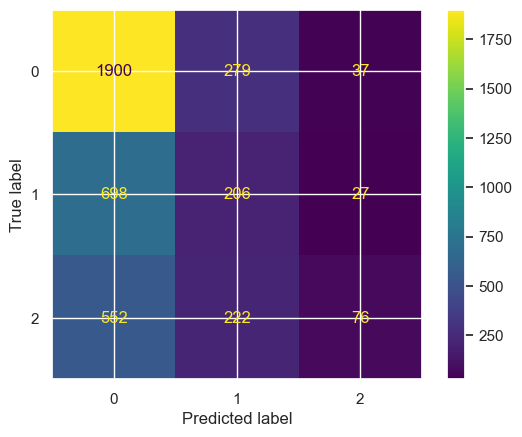

In [180]:
from sklearn.metrics import balanced_accuracy_score
bas_score = balanced_accuracy_score(y_va, y_pred)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

from sklearn.metrics import f1_score

valid_predictions = model_nc.predict(X_va)
valid_f1 = f1_score(y_va, y_pred, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()

# „Ç¨„Ç¶„Ç∑„Ç¢„É≥„Éä„Ç§„Éº„Éñ„Éô„Ç§„Ç∫„Å´„Çà„Çã‰∫àÊ∏¨

In [181]:
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(X_tr, y_tr)

y_pred = model_gnb.predict(X_va)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö
0.39040337367070044
„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö
0.38895594513569476
Ê∑∑ÂêàË°åÂàóÔºö
[[2753  583   95]
 [ 310   94   22]
 [  87   30   23]]


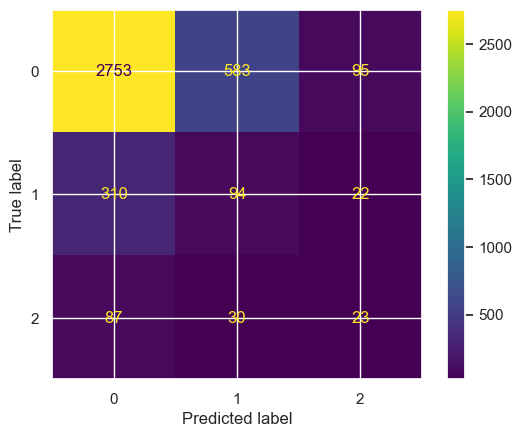

In [182]:
bas_score = balanced_accuracy_score(y_va, y_pred)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

from sklearn.metrics import f1_score

valid_predictions = model_gnb.predict(X_va)
valid_f1 = f1_score(y_va, y_pred, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()

# PassiveAggressiveClassifier„Å´„Çà„Çã‰∫àÊ∏¨

ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö
0.35991041961338993
„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö
0.371050213509361
Ê∑∑ÂêàË°åÂàóÔºö
[[2619  578  113]
 [ 516  120   16]
 [  15    9   11]]


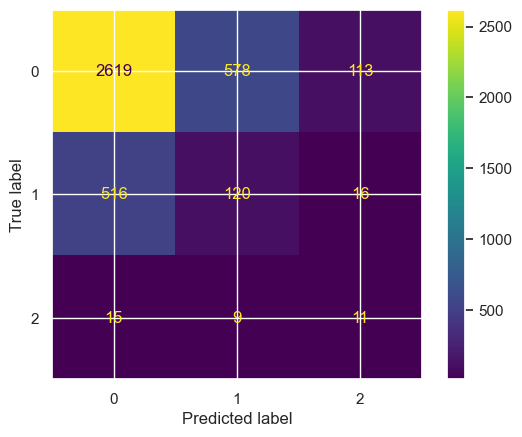

In [183]:
from sklearn.linear_model import PassiveAggressiveClassifier

model_pac = PassiveAggressiveClassifier()
model_pac.fit(X_tr, y_tr)

y_pred = model_pac.predict(X_va)
y_pred

bas_score = balanced_accuracy_score(y_va, y_pred)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

from sklearn.metrics import f1_score

valid_predictions = model_gnb.predict(X_va)
valid_f1 = f1_score(y_va, y_pred, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()

# „É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„ÉàÊ≥ï„Å´„Çà„Çã‰∫àÊ∏¨

In [184]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_tr, y_tr)

y_pred = model_rf.predict(X_va)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö
0.35037927602284036
„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö
0.3376290673465407
Ê∑∑ÂêàË°åÂàóÔºö
[[3052  663  123]
 [  84   43   14]
 [  14    1    3]]


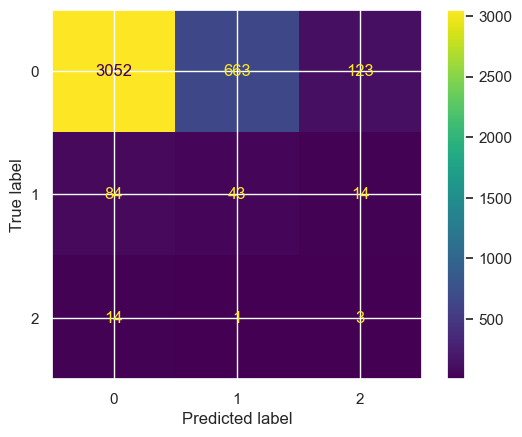

In [185]:
bas_score = balanced_accuracy_score(y_va, y_pred)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

from sklearn.metrics import f1_score

valid_predictions = model_rf.predict(X_va)
valid_f1 = f1_score(y_va, y_pred, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()

# ExtraTreeClassifier„ÇíÂ≠¶Áøí

In [186]:
from sklearn.tree import ExtraTreeClassifier

model_etc = ExtraTreeClassifier()
model_etc.fit(X_tr, y_tr)

y_pred = model_etc.predict(X_va)
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö
0.35402535491644405
„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö
0.35421719233332766
Ê∑∑ÂêàË°åÂàóÔºö
[[2542  542   98]
 [ 491  145   35]
 [ 117   20    7]]


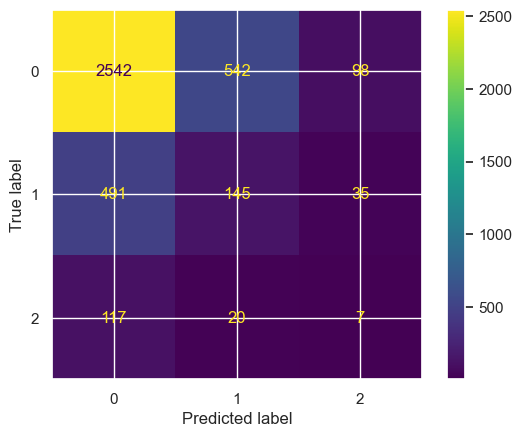

In [187]:
bas_score = balanced_accuracy_score(y_va, y_pred)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

from sklearn.metrics import f1_score
valid_f1 = f1_score(y_va, y_pred, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()

# DecisionTreeClassifier„ÇíÂ≠¶Áøí

In [188]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_tr, y_tr)

y_pred = model_dtc.predict(X_va)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö
0.37394520404421394
„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö
0.369384062212258
Ê∑∑ÂêàË°åÂàóÔºö
[[2407  503   96]
 [ 624  162   26]
 [ 119   42   18]]


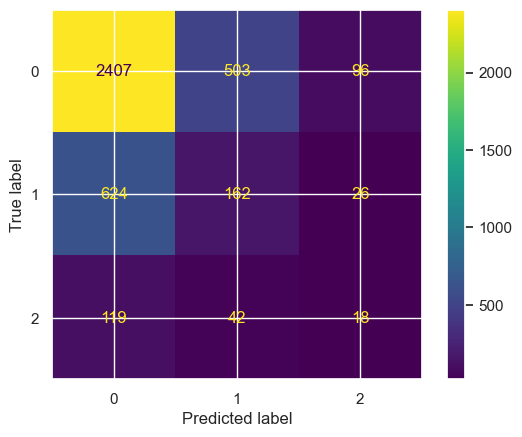

In [189]:
bas_score = balanced_accuracy_score(y_va, y_pred)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

from sklearn.metrics import f1_score
valid_f1 = f1_score(y_va, y_pred, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()

# QuadraticDiscriminantAnalysis„ÇíÂ≠¶Áøí

In [190]:
#„ÄÄQuadraticDiscriminantAnalysis„ÇíÂ≠¶Áøí
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_tr, y_tr)

y_pred = model_qda.predict(X_va)
y_pred

array([1, 0, 2, ..., 0, 1, 1], dtype=int64)

ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö
0.362982345853633
„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö
0.3351700635426467
Ê∑∑ÂêàË°åÂàóÔºö
[[1601  343   59]
 [1520  355   70]
 [  29    9   11]]


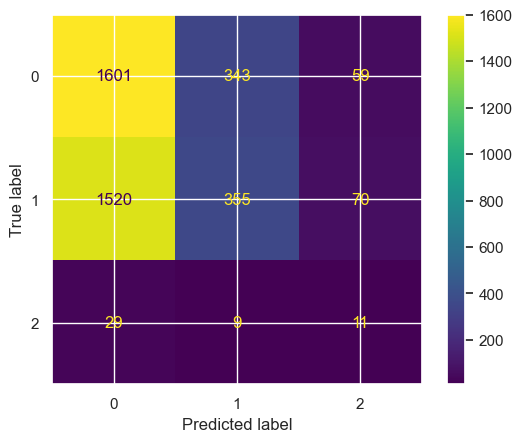

In [191]:
bas_score = balanced_accuracy_score(y_va, y_pred)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

from sklearn.metrics import f1_score
valid_f1 = f1_score(y_va, y_pred, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()

# LinearDiscriminantAnalysis

In [192]:
#„ÄÄQuadraticDiscriminantAnalysis„ÇíÂ≠¶Áøí
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_tr, y_tr)

y_pred = model_lda.predict(X_va)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö
0.37526743150505526
„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö
0.3582076627779813
Ê∑∑ÂêàË°åÂàóÔºö
[[3119  688  119]
 [   2    5    3]
 [  29   14   18]]


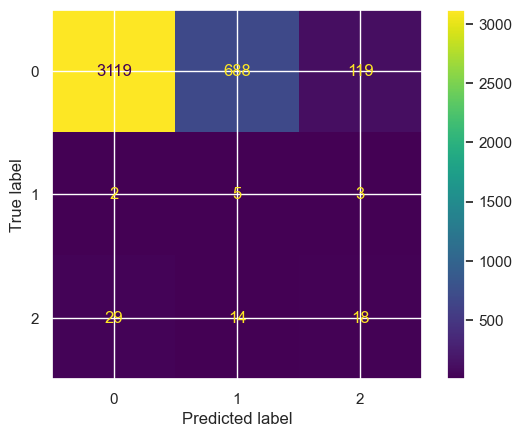

In [193]:
bas_score = balanced_accuracy_score(y_va, y_pred)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

from sklearn.metrics import f1_score
valid_f1 = f1_score(y_va, y_pred, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()

# BaggingClassifier„ÇíÂ≠¶Áøí

In [194]:
#„ÄÄQuadraticDiscriminantAnalysis„ÇíÂ≠¶Áøí
from sklearn.ensemble import BaggingClassifier

model_bc = BaggingClassifier()
model_bc.fit(X_tr, y_tr)

y_pred = model_bc.predict(X_va)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö
0.35502226413117505
„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö
0.3515834157277036
Ê∑∑ÂêàË°åÂàóÔºö
[[2966  645  118]
 [ 169   57   16]
 [  15    5    6]]


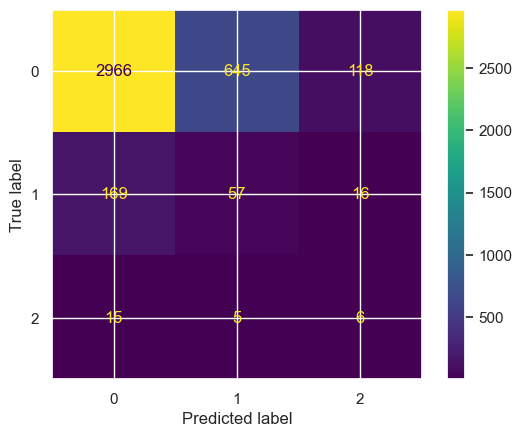

In [195]:
bas_score = balanced_accuracy_score(y_va, y_pred)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

from sklearn.metrics import f1_score
valid_f1 = f1_score(y_va, y_pred, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()

In [196]:
# Perceptron„ÇíÂ≠¶Áøí

In [197]:
from sklearn.linear_model import Perceptron

model_pcpt = BaggingClassifier()
model_pcpt.fit(X_tr, y_tr)

y_pred = model_pcpt.predict(X_va)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö
0.361978102572162
„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö
0.3623247159080097
Ê∑∑ÂêàË°åÂàóÔºö
[[2960  637  113]
 [ 173   63   19]
 [  17    7    8]]


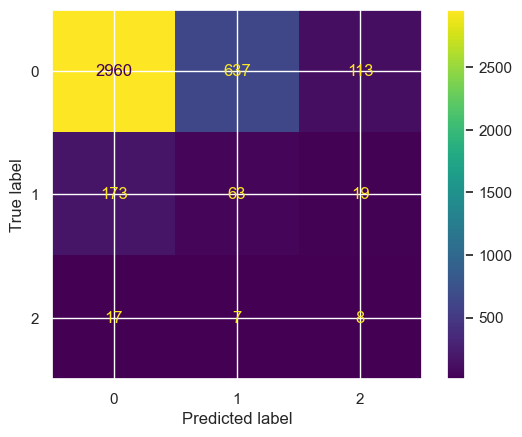

In [198]:
bas_score = balanced_accuracy_score(y_va, y_pred)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

from sklearn.metrics import f1_score
valid_f1 = f1_score(y_va, y_pred, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()

In [199]:
from sklearn.ensemble import ExtraTreesClassifier

model_etc = ExtraTreesClassifier()
model_etc.fit(X_tr, y_tr)

y_pred = model_etc.predict(X_va)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö
0.35007229294358005
„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö
0.3456040744323081
Ê∑∑ÂêàË°åÂàóÔºö
[[2919  652  119]
 [ 197   52   14]
 [  34    3    7]]


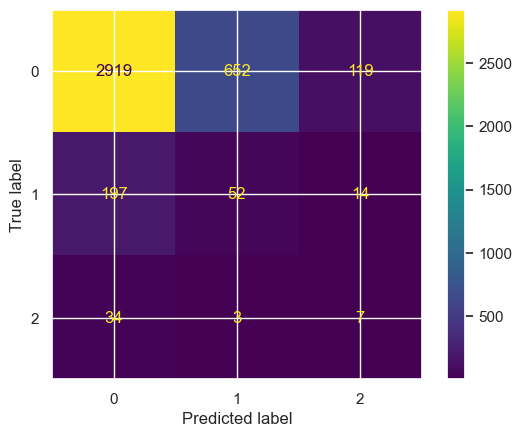

In [200]:
bas_score = balanced_accuracy_score(y_va, y_pred)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

from sklearn.metrics import f1_score
valid_f1 = f1_score(y_va, y_pred, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()

# ÊäïÁ®øÁî®„Éá„Éº„Çø„Çí‰ΩúÊàê

In [201]:
# Ë™¨ÊòéÂ§âÊï∞„ÉªÁõÆÁöÑÂ§âÊï∞
X_test = test[x_list]
X_test

# Ê¨†ÊêçÂÄ§Ë£úÂÆå
test.fillna('NULL', inplace=True)
X_test.fillna('NULL', inplace=True)
X_test

tree_dbh curb_loc steward   guards  sidewalk         user_type  \
19984        15   OnCurb    NULL     NULL    Damage   NYC Parks Staff   
19985         5   OnCurb    1or2     NULL  NoDamage         Volunteer   
19986         4   OnCurb    NULL   Unsure  NoDamage         Volunteer   
19987         7   OnCurb    NULL     NULL  NoDamage  TreesCount Staff   
19988         6   OnCurb    1or2  Helpful  NoDamage  TreesCount Staff   
...         ...      ...     ...      ...       ...               ...   
39964         3   OnCurb    1or2  Harmful    Damage         Volunteer   
39965         9   OnCurb    1or2     NULL  NoDamage   NYC Parks Staff   
39966        16   OnCurb    NULL     NULL    Damage         Volunteer   
39967        24   OnCurb    NULL     NULL    Damage  TreesCount Staff   
39968        25   OnCurb    NULL     NULL  NoDamage  TreesCount Staff   

                             problems         spc_common   nta  borocode  \
19984                            NULL       Callery pear  BK17         3   
19985                            NULL             cherry  BX62         2   
19986                            NULL  littleleaf linden  QN60         4   
19987                            NULL       dawn redwood  BK09         3   
19988                          Stones   purple-leaf plum  BK75         3   
...                               ...                ...   ...       ...   
39964                 StonesRootOther  Japanese snowbell  SI45         5   
39965                            NULL       silver maple  QN23         4   
39966                            NULL       Callery pear  BX01         2   
39967  RootOtherTrunkOtherBranchOther   London planetree  BK79         3   
39968                          Stones   London planetree  SI24         5   

       boro_ct       zip_city  cb_num  st_senate  st_assem  cncldist  
19984  3062000       Brooklyn     315         22        45        48  
19985  2045101          Bronx     212         34        81        11  
19986  4013800    Kew Gardens     409         14        27        29  
19987  3000301       Brooklyn     302         26        52        33  
19988  3025100       Brooklyn     303         25        56        36  
...        ...            ...     ...        ...       ...       ...  
39964  5012200  Staten Island     502         24        64        50  
39965  4093900  College Point     407         11        27        19  
39966  2039500          Bronx     206         33        86        15  
39967  3037300       Brooklyn     316         25        55        41  
39968  5017700  Staten Island     502         24        63        50  

[19702 rows x 16 columns]

In [202]:
X_test = pd.get_dummies(X_test, columns = dummy_list, drop_first=False)
X_test

tree_dbh                        problems         spc_common   nta  \
19984        15                            NULL       Callery pear  BK17   
19985         5                            NULL             cherry  BX62   
19986         4                            NULL  littleleaf linden  QN60   
19987         7                            NULL       dawn redwood  BK09   
19988         6                          Stones   purple-leaf plum  BK75   
...         ...                             ...                ...   ...   
39964         3                 StonesRootOther  Japanese snowbell  SI45   
39965         9                            NULL       silver maple  QN23   
39966        16                            NULL       Callery pear  BX01   
39967        24  RootOtherTrunkOtherBranchOther   London planetree  BK79   
39968        25                          Stones   London planetree  SI24   

       boro_ct       zip_city  cb_num  st_senate  st_assem  cncldist  ...  \
19984  3062000       Brooklyn     315         22        45        48  ...   
19985  2045101          Bronx     212         34        81        11  ...   
19986  4013800    Kew Gardens     409         14        27        29  ...   
19987  3000301       Brooklyn     302         26        52        33  ...   
19988  3025100       Brooklyn     303         25        56        36  ...   
...        ...            ...     ...        ...       ...       ...  ...   
39964  5012200  Staten Island     502         24        64        50  ...   
39965  4093900  College Point     407         11        27        19  ...   
39966  2039500          Bronx     206         33        86        15  ...   
39967  3037300       Brooklyn     316         25        55        41  ...   
39968  5017700  Staten Island     502         24        63        50  ...   

       sidewalk_Damage  sidewalk_NoDamage  user_type_NYC Parks Staff  \
19984                1                  0                          1   
19985                0                  1                          0   
19986                0                  1                          0   
19987                0                  1                          0   
19988                0                  1                          0   
...                ...                ...                        ...   
39964                1                  0                          0   
39965                0                  1                          1   
39966                1                  0                          0   
39967                1                  0                          0   
39968                0                  1                          0   

       user_type_TreesCount Staff  user_type_Volunteer  borocode_1  \
19984                           0                    0           0   
19985                           0                    1           0   
19986                           0                    1           0   
19987                           1                    0           0   
19988                           1                    0           0   
...                           ...                  ...         ...   
39964                           0                    1           0   
39965                           0                    0           0   
39966                           0                    1           0   
39967                           1                    0           0   
39968                           1                    0           0   

       borocode_2  borocode_3  borocode_4  borocode_5  
19984           0           1           0           0  
19985           1           0           0           0  
19986           0           0           1           0  
19987           0           1           0           0  
19988           0           1           0           0  
...           ...         ...         ...         ...  
39964           0           0           0           1  
39965          

In [203]:
X_test.columns

Index(['tree_dbh', 'problems', 'spc_common', 'nta', 'boro_ct', 'zip_city',
       'cb_num', 'st_senate', 'st_assem', 'cncldist',
       'curb_loc_OffsetFromCurb', 'curb_loc_OnCurb', 'steward_1or2',
       'steward_3or4', 'steward_4orMore', 'steward_NULL', 'guards_Harmful',
       'guards_Helpful', 'guards_NULL', 'guards_Unsure', 'sidewalk_Damage',
       'sidewalk_NoDamage', 'user_type_NYC Parks Staff',
       'user_type_TreesCount Staff', 'user_type_Volunteer', 'borocode_1',
       'borocode_2', 'borocode_3', 'borocode_4', 'borocode_5'],
      dtype='object')

In [204]:
# ‰∏ÄÊåô„Å´„Çø„Éº„Ç≤„ÉÉ„Éà„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞
for col in cols:
    column_means = train.groupby(col)["health"].mean("health")
    column_means
    
    colname = col + "_tg_enc"
    
    X_test[colname] = test[col].map(column_means)

In [205]:
# problems, spc_common„Çí„Éâ„É≠„ÉÉ„Éó„Ç¢„Ç¶„Éà
X_test = X_test.drop(drop_col , axis=1)
X_test

tree_dbh  curb_loc_OffsetFromCurb  curb_loc_OnCurb  steward_1or2  \
19984        15                        0                1             0   
19985         5                        0                1             1   
19986         4                        0                1             0   
19987         7                        0                1             0   
19988         6                        0                1             1   
...         ...                      ...              ...           ...   
39964         3                        0                1             1   
39965         9                        0                1             1   
39966        16                        0                1             0   
39967        24                        0                1             0   
39968        25                        0                1             0   

       steward_3or4  steward_4orMore  steward_NULL  guards_Harmful  \
19984             0                0             1               0   
19985             0                0             0               0   
19986             0                0             1               0   
19987             0                0             1               0   
19988             0                0             0               0   
...             ...              ...           ...             ...   
39964             0                0             0               1   
39965             0                0             0               0   
39966             0                0             1               0   
39967             0                0             1               0   
39968             0                0             1               0   

       guards_Helpful  guards_NULL  ...  problems_tg_enc  spc_common_tg_enc  \
19984               0            1  ...             0.24               0.26   
19985               0            1  ...             0.24               0.20   
19986               0            0  ...             0.24               0.25   
19987               0            1  ...             0.24               0.25   
19988               1            0  ...             0.25               0.24   
...               ...          ...  ...              ...                ...   
39964               0            0  ...             0.31               0.50   
39965               0            1  ...             0.24               0.23   
39966               0            1  ...             0.24               0.26   
39967               0            1  ...             0.21               0.23   
39968               0            1  ...             0.25               0.23   

       nta_tg_enc  borocode_tg_enc  boro_ct_tg_enc  zip_city_tg_enc  \
19984        0.22             0.24            0.32             0.24   
19985        0.34             0.25            0.25             0.25   
19986        0.19             0.26            0.25             0.18   
19987        0.15             0.24            0.06             0.24   
19988        0.22             0.24            0.16             0.24   
...           ...              ...             ...              ...   
39964        0.25             0.25            0.27             0.25   
39965        0.22             0.26            0.33             0.30   
39966        0.23             0.25            0.24             0.25   
39967        0.24             0.24            0.30             0.24   
39968        0.33             0.25            0.41             0.25   

       cb_num_tg_enc  st_senate_tg_enc  st_assem_tg_enc  cncldist_tg_enc  
19984           0.21              0.25             0.20             0.20  
19985           0.30              0.25             0.26             0.26  
19986           0.21              0.22             0.23             0.24  
19987           0.21              0.21             0.19             0.21  
19988           0.22              0.23             0.21             0.24  
...          

In [206]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_test)
X_test_std = pd.DataFrame(std_scaler.transform(X_test), columns=X_train.columns)
X_test_std
# X_train_std.describe()

tree_dbh  curb_loc_OffsetFromCurb  curb_loc_OnCurb  steward_1or2  \
0          0.41                    -0.26             0.26         -0.52   
1         -0.80                    -0.26             0.26          1.93   
2         -0.93                    -0.26             0.26         -0.52   
3         -0.56                    -0.26             0.26         -0.52   
4         -0.68                    -0.26             0.26          1.93   
...         ...                      ...              ...           ...   
19697     -1.05                    -0.26             0.26          1.93   
19698     -0.32                    -0.26             0.26          1.93   
19699      0.54                    -0.26             0.26         -0.52   
19700      1.51                    -0.26             0.26         -0.52   
19701      1.63                    -0.26             0.26         -0.52   

       steward_3or4  steward_4orMore  steward_NULL  guards_Harmful  \
0             -0.23            -0.03          0.60           -0.19   
1             -0.23            -0.03         -1.68           -0.19   
2             -0.23            -0.03          0.60           -0.19   
3             -0.23            -0.03          0.60           -0.19   
4             -0.23            -0.03         -1.68           -0.19   
...             ...              ...           ...             ...   
19697         -0.23            -0.03         -1.68            5.35   
19698         -0.23            -0.03         -1.68           -0.19   
19699         -0.23            -0.03          0.60           -0.19   
19700         -0.23            -0.03          0.60           -0.19   
19701         -0.23            -0.03          0.60           -0.19   

       guards_Helpful  guards_NULL  ...  problems_tg_enc  spc_common_tg_enc  \
0               -0.48         0.59  ...            -0.26               0.26   
1               -0.48         0.59  ...            -0.26              -0.67   
2               -0.48        -1.68  ...            -0.26              -0.01   
3               -0.48         0.59  ...            -0.26              -0.01   
4                2.07        -1.68  ...             0.04              -0.05   
...               ...          ...  ...              ...                ...   
19697           -0.48        -1.68  ...             1.35               3.85   
19698           -0.48         0.59  ...            -0.26              -0.35   
19699           -0.48         0.59  ...            -0.26               0.26   
19700           -0.48         0.59  ...            -0.93              -0.35   
19701           -0.48         0.59  ...             0.04              -0.35   

       nta_tg_enc  borocode_tg_enc  boro_ct_tg_enc  zip_city_tg_enc  \
0           -0.43            -0.89            0.62            -0.29   
1            1.82             0.04            0.05             0.01   
2           -1.13             1.25            0.05            -3.01   
3           -1.93            -0.89           -1.50            -0.29   
4           -0.58            -0.89           -0.71            -0.29   
...           ...              ...             ...              ...   
19697        0.08            -0.14            0.21            -0.04   
19698       -0.42             1.25            0.74             2.43   
19699       -0.29             0.04           -0.07             0.01   
19700       -0.21            -0.89            0.47            -0.29   
19701        1.57            -0.14            1.35            -0.04   

       cb_num_tg_enc  st_senate_tg_enc  st_assem_tg_enc  cncldist_tg_enc  
0              -1.02              0.04            -1.30            -1.48  
1               1.47             -0.00             0.46             0.47  
2              -1.14             -1.38            -0.42            -0.15  
3              -1.16             -1.54            -1.69            -1.20  
4              -0.83             -0.55            -1.08            -0.13  
...          

In [207]:
X_test_std = X_test_std[list]
X_test_std

tree_dbh  curb_loc_OnCurb  steward_1or2  steward_4orMore  steward_NULL  \
0          0.41             0.26         -0.52            -0.03          0.60   
1         -0.80             0.26          1.93            -0.03         -1.68   
2         -0.93             0.26         -0.52            -0.03          0.60   
3         -0.56             0.26         -0.52            -0.03          0.60   
4         -0.68             0.26          1.93            -0.03         -1.68   
...         ...              ...           ...              ...           ...   
19697     -1.05             0.26          1.93            -0.03         -1.68   
19698     -0.32             0.26          1.93            -0.03         -1.68   
19699      0.54             0.26         -0.52            -0.03          0.60   
19700      1.51             0.26         -0.52            -0.03          0.60   
19701      1.63             0.26         -0.52            -0.03          0.60   

       guards_Helpful  guards_NULL  guards_Unsure  sidewalk_Damage  \
0               -0.48         0.59          -0.20             1.07   
1               -0.48         0.59          -0.20            -0.94   
2               -0.48        -1.68           5.02            -0.94   
3               -0.48         0.59          -0.20            -0.94   
4                2.07        -1.68          -0.20            -0.94   
...               ...          ...            ...              ...   
19697           -0.48        -1.68          -0.20             1.07   
19698           -0.48         0.59          -0.20            -0.94   
19699           -0.48         0.59          -0.20             1.07   
19700           -0.48         0.59          -0.20             1.07   
19701           -0.48         0.59          -0.20            -0.94   

       sidewalk_NoDamage  ...  user_type_tg_enc  problems_tg_enc  \
0                  -1.07  ...              2.33            -0.26   
1                   0.94  ...             -0.50            -0.26   
2                   0.94  ...             -0.50            -0.26   
3                   0.94  ...             -0.28            -0.26   
4                   0.94  ...             -0.28             0.04   
...                  ...  ...               ...              ...   
19697              -1.07  ...             -0.50             1.35   
19698               0.94  ...              2.33            -0.26   
19699              -1.07  ...             -0.50            -0.26   
19700              -1.07  ...             -0.28            -0.93   
19701               0.94  ...             -0.28             0.04   

       spc_common_tg_enc  nta_tg_enc  boro_ct_tg_enc  zip_city_tg_enc  \
0                   0.26       -0.43            0.62            -0.29   
1                  -0.67        1.82            0.05             0.01   
2                  -0.01       -1.13            0.05            -3.01   
3                  -0.01       -1.93           -1.50            -0.29   
4                  -0.05       -0.58           -0.71            -0.29   
...                  ...         ...             ...              ...   
19697               3.85        0.08            0.21            -0.04   
19698              -0.35       -0.42            0.74             2.43   
19699               0.26       -0.29           -0.07             0.01   
19700              -0.35       -0.21            0.47            -0.29   
19701              -0.35        1.57            1.35            -0.04   

       cb_num_tg_enc  st_senate_tg_enc  st_assem_tg_enc  cncldist_tg_enc  
0              -1.02              0.04            -1.30            -1.48  
1               1.47             -0.00             0.46             0.47  
2              -1.14             -1.38            -0.42            -0.15  
3              -1.16             -1.54            -1.69            -1.20  
4              -0.83             -0.55            -1.08            -0.13  
...              ...               ...           

In [208]:
# ‰∫àÊ∏¨
y_test_pred = model_gnb.predict(X_test_std)
y_test_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [209]:
# NOTE ‰∫àÊ∏¨ÁµêÊûú„Çí1Ê¨°ÂÖÉ„Éô„ÇØ„Éà„É´„Å´„Åô„Çã
y_test_pred = np.squeeze(y_test_pred)
y_test_pred.shape
y_test_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [210]:
# NOTE ‰∫àÊ∏¨ÁµêÊûú„Çípd„Å´„Åó„Å¶Âá¶ÁêÜ
df_submit = pd.DataFrame(data=y_test_pred, columns=['y_pred'])
df_submit

y_pred
0           0
1           0
2           1
3           0
4           0
...       ...
19697       1
19698       0
19699       0
19700       0
19701       0

[19702 rows x 1 columns]

In [211]:
df_submit.value_counts()

y_pred
0         16675
1          2403
2           624
dtype: int64

In [212]:
df_submit['y_pred'] = df_submit['y_pred'].map({0:1, 1:0, 2:2})
df_submit

y_pred
0           1
1           1
2           0
3           1
4           1
...       ...
19697       0
19698       1
19699       1
19700       1
19701       1

[19702 rows x 1 columns]

In [213]:
df_submit.value_counts()

y_pred
1         16675
0          2403
2           624
dtype: int64

In [214]:
y_test_pred = df_submit["y_pred"].to_numpy()

In [215]:
sample_submit[1] = y_test_pred
sample_submit

1
0       
19984  1
19985  1
19986  0
19987  1
19988  1
...   ..
39964  0
39965  1
39966  1
39967  1
39968  1

[19702 rows x 1 columns]

In [216]:
#Êú®„ÅÆÂÅ•Â∫∑Áä∂ÊÖã„Çí0„Éª1„ÇíÁΩÆ„ÅçÊèõ„Åà„Çã
#train['health'] = train['health'].map({0:1, 1:0, 2:2})
#train

sample_submit.to_csv('submit_30_GNB_05.csv', header=None)